<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style="font-weight: normal;"><a href="#3">Modeling & Evaluation</a></span></li>
  <ol style="list-style-type:lower-alpha;">
    <li><span style="font-weight: normal;"><a href="#definition-of-the-problem--metrics-for-evaluation">Definition of the Problem & Metrics for Evaluation</a></span></li>
  </ol>
  <br>
  <ol style="list-style-type:alpha;">
    <li><span style="font-weight: normal;"><a href="#logistic-regression">Logistic Regression</a></span></li>
    <li><span style="font-weight: normal;"><a href="#naive-bayes">Naive Bayes</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#naive-bayes-categorical">Naive Bayes - Categorical</a></span></li>
      <li><span style="font-weight: normal;"><a href="#naive-bayes-gaussian">Naive Bayes - Gaussian</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#knn">K-Nearest Neighbors</a></span></li>
    <li><span style="font-weight: normal;"><a href="#neural-network">Neural Network</a></span></li>
    <li><span style="font-weight: normal;"><a href="#decision-tree">Decision Tree</a></span></li>
    <li><span style="font-weight: normal;"><a href="#random-forest">Random Forest</a></span></li>
    <li><span style="font-weight: normal;"><b>Ensemble Models</b></span>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#gradient-boosting">Gradient Boosting</a></span></li>
      <li><span style="font-weight: normal;"><a href="#bagging">Bagging</a></span></li>
      <li><span style="font-weight: normal;"><a href="#catboost">CatBoost</a></span></li>
      <li><span style="font-weight: normal;"><a href="#stacking">Stacking</a></span></li>
  </ol> <br>
  <ol style="list-style-type:decimal;">
    <li><span style="font-weight: normal;"><a href="#3_1">Model Selection</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_2">Model Evaluation</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_3">Model Optimization</a></span></li>
  </ol>
  <li><span style="font-weight: normal;"><a href="#📊-feature-importance">Feature Importance</a></span></li>
  <li><span style="font-weight: normal;"><a href="#🔮-test-data-prediction">Test Data Prediction</a></span></li>
  <li><span style="font-weight: normal;"><a href="#📋-csv-export---submission">CSV Export - Submission [Kaggle]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-interpretability-and-explanability-open-ended-section">Interpretability and Explanability [Open-Ended Section]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-save-model-pickle-open-ended-section">Save Model (Pickle) [Open-Ended Section]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-bibliographyreferences">Bibliography/References</a></span></li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [4]:
# !pip install catboost

In [5]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# For treating imbalanced data
from imblearn.over_sampling import KMeansSMOTE

# For modeling
import time
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, ExtraTreesClassifier

# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_validate, learning_curve
from sklearn.model_selection import PredefinedSplit
from tqdm import tqdm                         # For progress bar

# Disable warnings [DataConversionWarning & ConvergenceWarning & FutureWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

In [6]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """
    :param args: Variable number of DataFrame objects to be displayed side by side.
    :param super_title: The main title to be displayed at the top of the combined view.
    :param titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.
    
    :return: None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## **🧮 Import Databases**

In [7]:
# ------------------------------------------------- Importing the dataset -------------------------------------------------
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/test_data.parquet')

# Load the target variable after feature engineering
y_train = pd.read_parquet('data/2ndNotebook/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/y_val.parquet').squeeze()       # .squeeze() to convert to Series


# Check the shape of the training, validation and test data (Features - X)
print(X_train.shape, X_val.shape, test_data.shape)

# Check the shape of the training, validation and test data (Target - y)
print('\n',y_train.shape, y_val.shape)

(430519, 145) (143507, 145) (387975, 145)

 (430519,) (143507,)


In [8]:
# Display the first 2 rows of each dataset
# X_train.head(2) 

In [9]:
# test_data.head(2)

In [10]:
# y_train.head(2)

In [11]:
# X_train.head(2)

In [12]:
# Drop features based on Feature Selection [2nd Notebook]
columns_to_keep = [
    "Age at Injury Clean",
    "Assembly Date Year",
    "C-2 Date Year",
    "Accident Date Binary",
    "Alternative Dispute Resolution_Y",
    "Attorney/Representative_Y",
    "C-2 Date Binary",
    "C-3 Date Binary",
    "COVID-19 Indicator_Y",
    "Carrier Type Bucket_1A. PRIVATE",
    "Carrier Type Bucket_2A. SIF",
    "Carrier Type Bucket_3A. SELF PUBLIC",
    "Carrier Type Bucket_4A. SELF PRIVATE",
    "Carrier Type Bucket_5A-5C. SPECIAL FUND",
    "District Name_NYC",
    "First Hearing Date Binary",
    "Gender_M",
    "IME-4 Reported",
    "Industry Code Description_CONSTRUCTION",
    "Industry Code Description_PUBLIC ADMINISTRATION",
    "Industry Code Description_Unknown",
    "WCIO Cause of Injury Bucket_3 - Cut",
    "WCIO Cause of Injury Bucket_6 - Strain_data",
    "WCIO Nature of Injury Bucket_1 - Specific",
    "WCIO Nature of Injury Bucket_2 - Occupational/Cumulative",
    "WCIO Nature of Injury Bucket_3 - Multiple",
    "WCIO Part of Body Bucket_III - Upper Extremities",
    "WCIO Part of Body Bucket_IV - Trunk",
    "WCIO Part of Body Bucket_V - Lower Extremities",
    "Weekly Wage Reported"
]

X_train = X_train[columns_to_keep]
X_val = X_val[columns_to_keep]
test_data = test_data[columns_to_keep]

# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, test_data.shape)

print('\n',y_train.shape, y_val.shape)

(430519, 30) (143507, 30) (387975, 30)

 (430519,) (143507,)


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

In [13]:
# Palette of colors | Blues
palette = ['#002147', '#084594', '#135C9B', '#2171B5', '#4292C6', '#6BAED6', '#9ECAE1', '#C6DBEF', '#DEEBF7', '#F7FBFF']

# Dictionary Palette of colors for 'Claim Injury Type'
claim_injury_type_palette = dict(zip(sorted(y_train.unique()), palette))
claim_injury_type_palette

{1: '#002147',
 2: '#084594',
 3: '#135C9B',
 4: '#2171B5',
 5: '#4292C6',
 6: '#6BAED6',
 7: '#9ECAE1',
 8: '#C6DBEF'}

In [14]:
# Dictionary with the mapping of the predicted values
claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY", 
                                  5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

In [15]:
# Absolute and Relative Frequency of the target variable [Train & Validation]
claim_injury_type_train = y_train.value_counts().reset_index().rename(columns={'index': 'Claim Injury Type', 'count': 'n'})
claim_injury_type_train['%'] = round((claim_injury_type_train['n'] / claim_injury_type_train['n'].sum()) * 100, 2)

claim_injury_type_val = y_val.value_counts().reset_index().rename(columns={'index': 'Claim Injury Type', 'count': 'n'})
claim_injury_type_val['%'] = round((claim_injury_type_val['n'] / claim_injury_type_val['n'].sum()) * 100, 2)

# Concatenate the dataframes
claim_injury_type_freq = pd.concat([claim_injury_type_train.set_index('Claim Injury Type'), claim_injury_type_val.set_index('Claim Injury Type')], axis=1, keys=["Train", "Validation"])
claim_injury_type_freq

Train        Validation       
                        n      %          n      %
Claim Injury Type                                 
2                  218308  50.71      72770  50.71
4                  111380  25.87      37127  25.87
3                   51679  12.00      17227  12.00
5                   36210   8.41      12070   8.41
1                    9358   2.17       3119   2.17
6                    3158   0.73       1053   0.73
8                     353   0.08        117   0.08
7                      73   0.02         24   0.02

## **📈📉 Data Normalization**

In [16]:
# Descriptive statistics of the training data after feature engineering
# X_train.describe()

> For **Modeling & Evaluation**, we will normalize the data using the **`StandardScaler`** and **`MinMaxScaler`** methods, to evaluate the best performance of the models.

In [17]:
# Define binary and numerical columns
binary_columns = X_train.columns[(X_train.nunique() == 2)].sort_values()
numerical_columns = X_train.columns[(X_train.nunique() > 2) & (X_train.columns.isin(binary_columns) == False)].sort_values()

print('\033[1mBinary Columns:\033[0m [', len(binary_columns), ']')
print(binary_columns)
print('\n\033[1mNumerical Columns:\033[0m [', len(numerical_columns), ']')
print(numerical_columns)

# Transform to list
binary_columns = list(binary_columns)
numerical_columns = list(numerical_columns)

# Check if the binary + numerical columns are equal to the total number of columns
print(len(binary_columns) + len(numerical_columns) == X_train.shape[1])

Binary Columns: [ 27 ]
Index(['Accident Date Binary', 'Alternative Dispute Resolution_Y',
       'Attorney/Representative_Y', 'C-2 Date Binary', 'C-3 Date Binary',
       'COVID-19 Indicator_Y', 'Carrier Type Bucket_1A. PRIVATE',
       'Carrier Type Bucket_2A. SIF', 'Carrier Type Bucket_3A. SELF PUBLIC',
       'Carrier Type Bucket_4A. SELF PRIVATE',
       'Carrier Type Bucket_5A-5C. SPECIAL FUND', 'District Name_NYC',
       'First Hearing Date Binary', 'Gender_M', 'IME-4 Reported',
       'Industry Code Description_CONSTRUCTION',
       'Industry Code Description_PUBLIC ADMINISTRATION',
       'Industry Code Description_Unknown',
       'WCIO Cause of Injury Bucket_3 - Cut',
       'WCIO Cause of Injury Bucket_6 - Strain_data',
       'WCIO Nature of Injury Bucket_1 - Specific',
       'WCIO Nature of Injury Bucket_2 - Occupational/Cumulative',
       'WCIO Nature of Injury Bucket_3 - Multiple',
       'WCIO Part of Body Bucket_III - Upper Extremities',
       'WCIO Part of Body Bu

In [18]:
# Standardize the data [For the 'KNN' and 'Logistic Regression' models, let's normalize the variables]
# Apply MinMaxScaler to the training, validation, and test data
minmax_scaler = MinMaxScaler().fit(X_train)

# Apply MinMaxScaler to all columns
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
test_data_norm = test_data.copy()

X_train_norm[:] = minmax_scaler.transform(X_train)
X_val_norm[:] = minmax_scaler.transform(X_val)
test_data_norm[:] = minmax_scaler.transform(test_data)

# Apply StandardScaler to all columns
standard_scaler = StandardScaler().fit(X_train)
X_train_stand = X_train.copy()
X_val_stand = X_val.copy()
test_data_stand = test_data.copy()

X_train_stand[:] = standard_scaler.transform(X_train)
X_val_stand[:] = standard_scaler.transform(X_val)
test_data_stand[:] = standard_scaler.transform(test_data)

# Apply RobustScaler to all columns
robust_scaler = RobustScaler().fit(X_train)
X_train_robust_scaled = X_train.copy()
X_val_robust_scaled = X_val.copy()
test_data_robust_scaled = test_data.copy()

X_train_robust_scaled[:] = robust_scaler.transform(X_train)
X_val_robust_scaled[:] = robust_scaler.transform(X_val)
test_data_robust_scaled[:] = robust_scaler.transform(test_data)

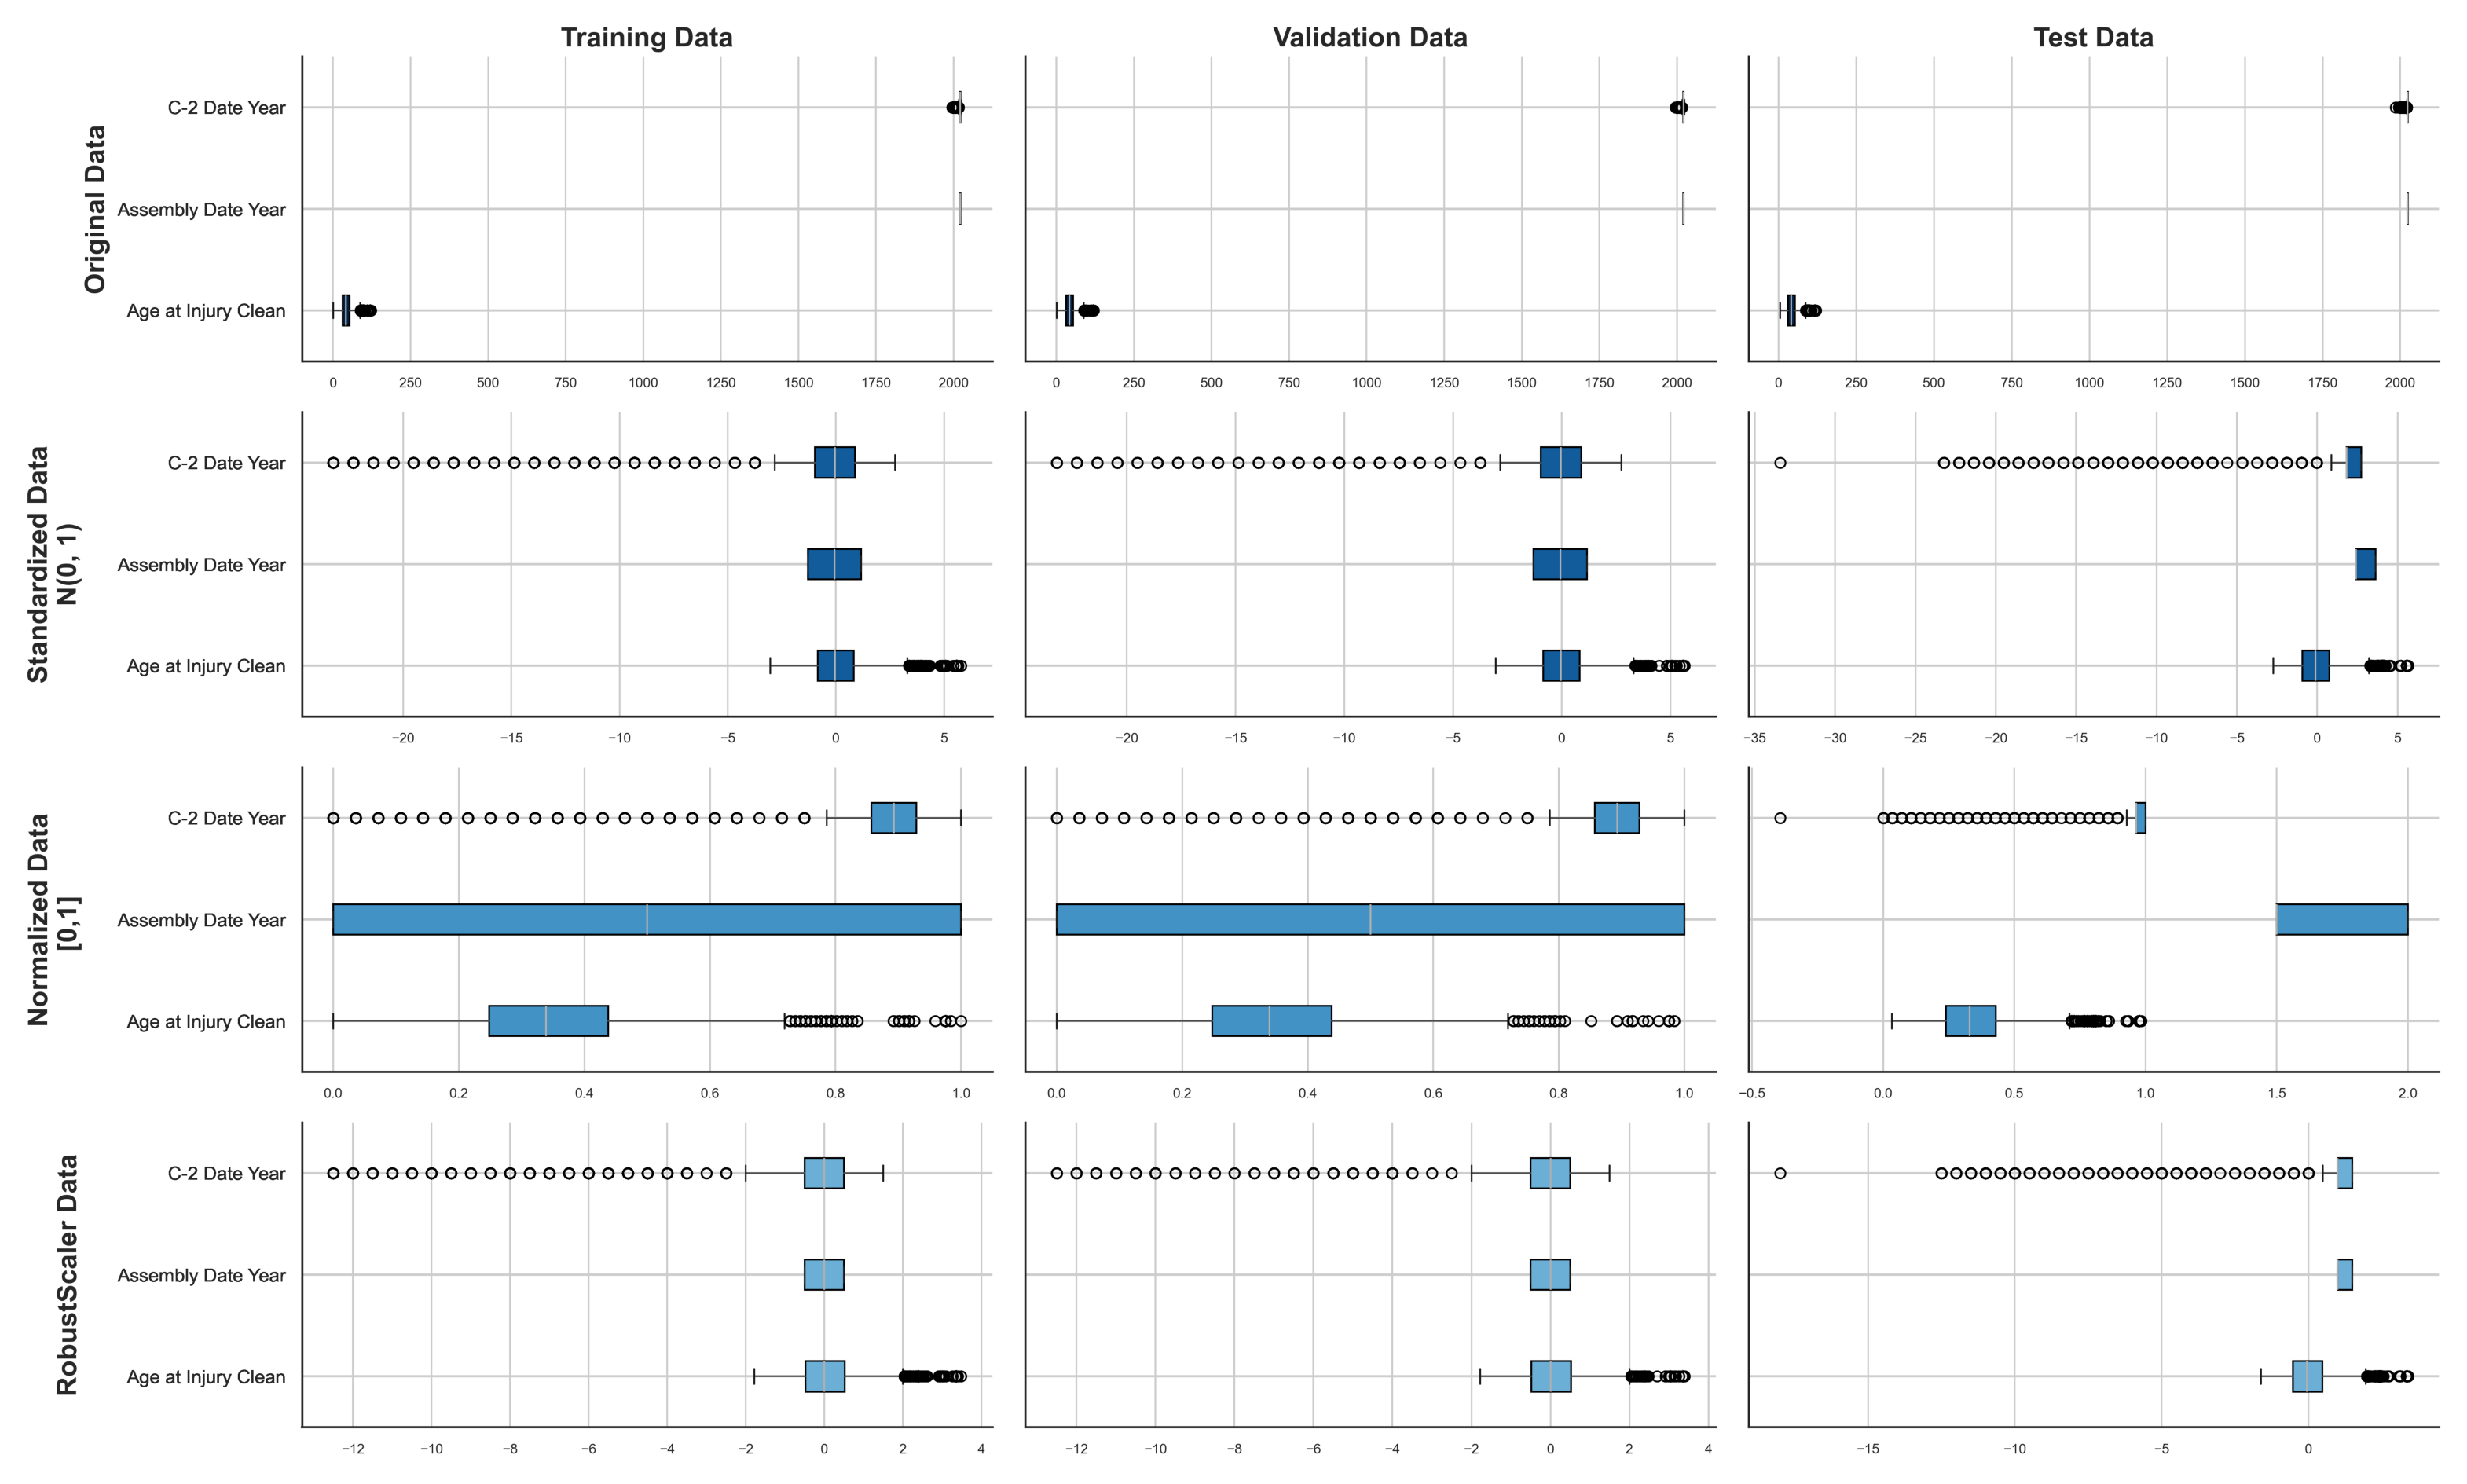

In [19]:
# Since plotting the boxplots of metric + ordinal columns for each dataset (Train, Validation, Test) with different scalers takes some time, we'll just do it if it hasn't already been saved
# Check if the file exists and if its update date is not today
file_path = './[ML]_Project_EDAOutputs_Group33/Modeling/Boxplots_ScalersTransformations.png'
if not os.path.isfile(file_path) or datetime.fromtimestamp(os.path.getmtime(file_path)).date() != datetime.today().date(): 
    
    # Plot Boxplots of Original Data, Standardized Data, Normalized Data, and Log Transformation for Train, Validation, and Test Sets
    fig, ax = plt.subplots(4, 3, figsize=(20, 12), sharey=True)  # 4 rows for each transformation and 3 columns for Train, Validation, Test

    # Define titles for columns
    col_titles = ['Training Data', 'Validation Data', 'Test Data']

    # Original Data - Train, Validation, Test
    X_train[numerical_columns].boxplot(ax=ax[0, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#002147'))
    X_val[numerical_columns].boxplot(ax=ax[0, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#002147'))
    test_data[numerical_columns].boxplot(ax=ax[0, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#002147'))
    ax[0, 0].set_ylabel('Original Data', fontsize=16, fontweight='bold')

    # Standardized Data - Train, Validation, Test
    X_train_stand[numerical_columns].boxplot(ax=ax[1, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#135C9B'))
    X_val_stand[numerical_columns].boxplot(ax=ax[1, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#135C9B'))
    test_data_stand[numerical_columns].boxplot(ax=ax[1, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#135C9B'))
    ax[1, 0].set_ylabel('Standardized Data\nN(0, 1)\n', fontsize=16, fontweight='bold')

    # Normalized Data - Train, Validation, Test
    X_train_norm[numerical_columns].boxplot(ax=ax[2, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#4292C6'))
    X_val_norm[numerical_columns].boxplot(ax=ax[2, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#4292C6'))
    test_data_norm[numerical_columns].boxplot(ax=ax[2, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#4292C6'))
    ax[2, 0].set_ylabel('Normalized Data\n[0,1] \n', fontsize=16, fontweight='bold')

    # RobustScaler Data - Train, Validation, Test
    X_train_robust_scaled[numerical_columns].boxplot(ax=ax[3, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#6BAED6'))
    X_val_robust_scaled[numerical_columns].boxplot(ax=ax[3, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#6BAED6'))
    test_data_robust_scaled[numerical_columns].boxplot(ax=ax[3, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#6BAED6'))
    ax[3, 0].set_ylabel('RobustScaler Data\n', fontsize=16, fontweight='bold')

    # Set column titles
    for col in range(3):
        ax[0, col].set_title(col_titles[col], fontsize=16, fontweight='bold')

    # Adjust x-ticks rotation
    for row in range(4):
        for col in range(3):
            ax[row, col].tick_params(axis='x', rotation=0, labelsize=8)

    # Despine and adjust layout
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    plt.show()

# Otherwise plot the saved image
else:
    plt.figure(figsize=(20, 60))
    plt.imshow(plt.imread(file_path))
    plt.axis('off')
    plt.show()

---

## **🌱 Treatment of Data Imbalance** <a class='anchor' id='data-imbalance'></a>

In [20]:
# ---------------------------------- [SMOTE] - Synthetic Minority Over-sampling Technique ----------------------------------
# Source: https://arxiv.org/abs/1106.1813
#         https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Create a directory to save the data for the 3rd notebook
if not os.path.exists('data/3rdNotebook/'):
    os.makedirs('data/3rdNotebook/')

# Check if the data after applying SMOTE is already saved [If not, apply SMOTE and save the data]
if not os.path.isfile('data/3rdNotebook/X_train_KMeansSMOTE.parquet') or not os.path.isfile('data/3rdNotebook/y_train_KMeansSMOTE.parquet'):
    # Apply KMeansSMOTE to the training data
    ksmote = KMeansSMOTE(random_state=2024, cluster_balance_threshold=0.0001, n_jobs=-1)
    X_train_smote, y_train_smote = ksmote.fit_resample(X_train, y_train)
        
    # Save the X_train_smote and y_train_smote data (After applying KMeansSMOTE)
    X_train_smote.to_parquet('data/3rdNotebook/X_train_KMeansSMOTE.parquet', engine = 'fastparquet')
    y_train_smote.to_frame().to_parquet('data/3rdNotebook/y_train_KMeansSMOTE.parquet', engine = 'fastparquet')
    
# Load the data after applying SMOTE
X_train_smote = pd.read_parquet('data/3rdNotebook/X_train_KMeansSMOTE.parquet')
y_train_smote = pd.read_parquet('data/3rdNotebook/y_train_KMeansSMOTE.parquet').squeeze()   # .squeeze() to convert to Series

# Check the shape of the training data after applying SMOTE
print(X_train_smote.shape, y_train_smote.shape)

## Time of Execution [KMeansSMOTE] = 5min 15s

(1746494, 30) (1746494,)


In [21]:
# Check if the columns are the same in the training data after applying SMOTE [Error if not]
if X_train.columns.equals(X_train_smote.columns) == False:
    raise ValueError("Columns are not the same in the training data after applying SMOTE | Please delete the saved data and rerun the code to apply SMOTE again")

In [22]:
# Check the distribution of the target variable after applying SMOTE
pd.DataFrame({
    'Original Data | n': y_train.value_counts(),
    'Original Data | %': y_train.value_counts(normalize=True).mul(100).round(2),
    'KMeansSMOTE Data | n': y_train_smote.value_counts(),
    'KMeansSMOTE Data | %': y_train_smote.value_counts(normalize=True).mul(100).round(2)
})

,Original Data | n,Original Data | %,KMeansSMOTE Data | n,KMeansSMOTE Data | %
Claim Injury Type,,,,
1,9358,2.17,218311,12.5
2,218308,50.71,218308,12.5
3,51679,12.00,218312,12.5
4,111380,25.87,218313,12.5
5,36210,8.41,218313,12.5
6,3158,0.73,218312,12.5
7,73,0.02,218312,12.5
8,353,0.08,218313,12.5


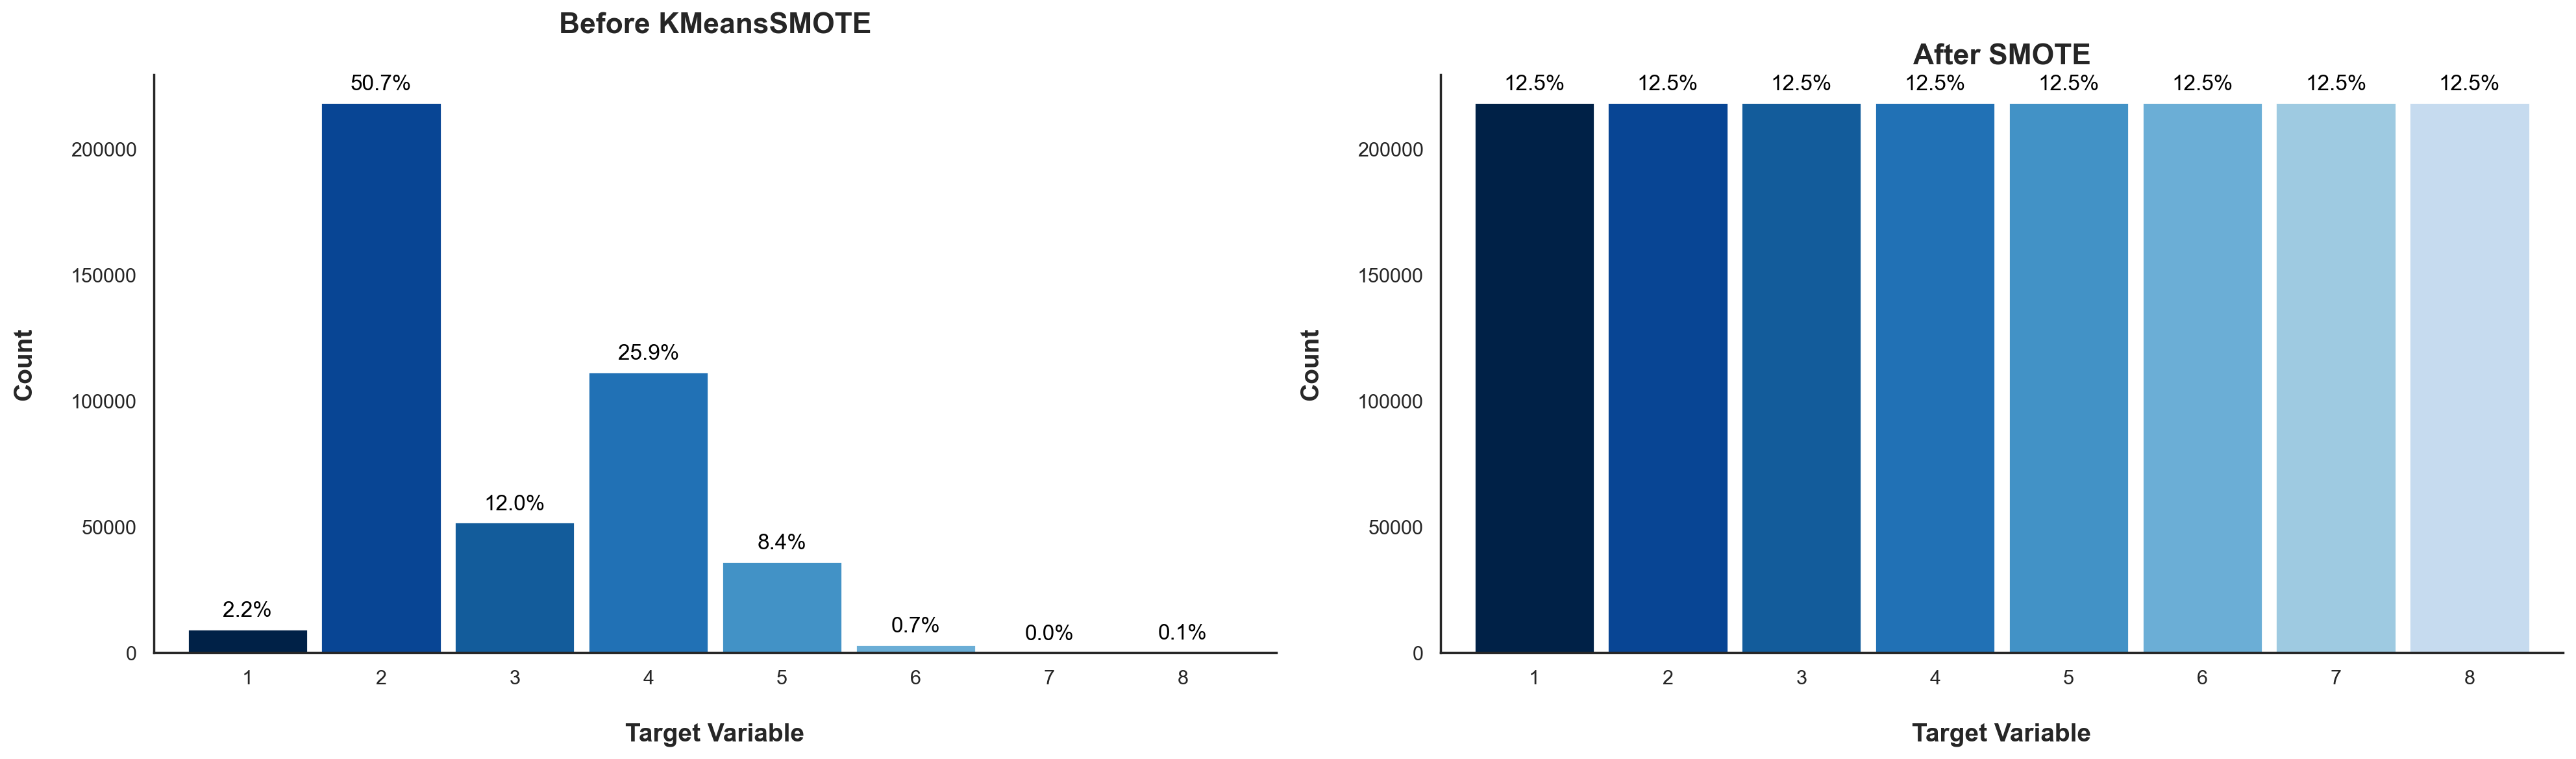

In [23]:
# Plot the distribution of the target variable before & after applying KMeansSMOTE
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Before KMeansSMOTE                                                                                  ############## NOT FINISHED ##############
y_train.value_counts().sort_index().plot(kind='bar', ax=ax[0], color=palette[:8], width=.9)
ax[0].set_title('Before KMeansSMOTE\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nTarget Variable', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Count\n', fontsize=14, fontweight='bold')
ax[0].tick_params(axis='x', rotation=0)

# Add % labels to the bars
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()/len(y_train)*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', 
                   xytext=(0, 10), textcoords='offset points')

# After KMeansSMOTE
y_train_smote.value_counts().sort_index().plot(kind='bar', ax=ax[1], color=palette[:8], width=.9)
ax[1].set_title('After SMOTE', fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nTarget Variable', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Count\n', fontsize=14, fontweight='bold')
ax[1].tick_params(axis='x', rotation=0)


# Add % labels to the bars
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()/len(y_train_smote)*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', 
                   xytext=(0, 10), textcoords='offset points')

# Despine and adjust layout
sns.despine(top=True, right=True)
plt.tight_layout()
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/TargetDistribution_SMOTE.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# # Scale the data after applying SMOTE
# # Apply MinMaxScaler to the training data after applying SMOTE
# X_train_smote_norm = X_train_smote.copy()
# X_val_smote_norm = X_val.copy()

# minmax_scaler_smote = MinMaxScaler().fit(X_train_smote)
# X_train_smote_norm[:] = minmax_scaler_smote.transform(X_train_smote)
# X_val_smote_norm[:] = minmax_scaler_smote.transform(X_val)

# # Apply StandardScaler to the training data after applying SMOTE
# X_train_smote_stand = X_train_smote.copy()
# X_val_smote_stand = X_val.copy()

# standard_scaler_smote = StandardScaler().fit(X_train_smote)
# X_train_smote_stand[:] = standard_scaler_smote.transform(X_train_smote)
# X_val_smote_stand[:] = standard_scaler_smote.transform(X_val)

# # Apply RobustScaler to the training data after applying SMOTE
# X_train_smote_robust_scaled = X_train_smote.copy()
# X_val_smote_robust_scaled = X_val.copy()

# robust_scaler_smote = RobustScaler().fit(X_train_smote)
# X_train_smote_robust_scaled[:] = robust_scaler_smote.transform(X_train_smote)
# X_val_smote_robust_scaled[:] = robust_scaler_smote.transform(X_val)

---

# **💡 Modeling**

### **Definition of the Problem & Metrics for Evaluation**

> The problem consists of predict the WCB’s final decision on what type of injury (Claim Injury Type) should be granted. <br>
> Since the target variable is **category** and **multiclass**, we will use **Classification Models** to solve this problem.

<br>

> Since we have a **Classification Problem**, we will use the following metrics to evaluate the models **[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

- **Accuracy**: The proportion of *true results* among the *total number of cases* examined.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $$

- **Precision**: The proportion of *true positive* results among the *positive results predicted by the model*.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

- **Recall**: The proportion of *true positive* results among the *actual positive results*.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

- **F1-Score**: The harmonic mean of ***precision*** and ***recall***.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)** $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

   - **F1-Score (Macro)**: The average of the F1-Score for each class. $$ \text{F1-Score (Macro)} = \frac{1}{N} \sum_{i=1}^{N} \text{F1-Score}_i $$
   - **F1-Score (Weighted)**: The weighted average of the F1-Score for each class. $$ \text{F1-Score (Weighted)} = \frac{\sum_{i=1}^{N} \text{F1-Score}_i \times \text{Support}_i}{\sum_{i=1}^{N} \text{Support}_i} $$ <br> Where $\text{Support}_i$ is the number of occurrences of class $i$ in the dataset and $N$ is the number of classes. <br> <br> <br>
   - **F1-Score (Micro)**: The F1-Score for the entire dataset. $$ \text{F1-Score (Micro)} = \frac{\sum_{i=1}^{N} \text{TP}_i}{\sum_{i=1}^{N} \text{TP}_i + \frac{1}{2} \times \left( \sum_{i=1}^{N} \text{FP}_i + \sum_{i=1}^{N} \text{FN}_i \right)} $$ <br> Where $\text{TP}_i$, $\text{FP}_i$, and $\text{FN}_i$ are the ***True Positive***, ***False Positive***, and ***False Negative*** for class $i$, respectively. <br> <br>

- **Confusion Matrix**: A table that is often used to describe the performance of a classification model on a set of data for which the true values are known.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**
  - **True Positive (TP)**: The number of correct positive predictions.   
  - **True Negative (TN)**: The number of correct negative predictions.
  - **False Positive (FP)**: The number of incorrect positive predictions.
  - **False Negative (FN)**: The number of incorrect negative predictions.


<style>
.tablecustom {
    border-collapse: collapse;
    width: 100%;
    font-size: 16px;
}

.tablecustom td, .tablecustom th {
    border: 2px solid #ddd;
    padding: 8px;
}

.tablecustom tr:nth-child(1) th {
    background-color: #e0e0e0; /* Header row background */
    font-weight: bold;
    color: #000;
}
.tablecustom th:first-child, .tablecustom td:first-child {
    background-color: #e0e0e0; /* First column background */
    font-weight: bold;
    color: #000;
}

.tablecustom th:first-child {
    border-top: none;
    border-left: none;
    background-color: #fff !important;
}

</style>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">

|  | Predicted: **NO** | Predicted: **YES** |
|---|---|---|
| **Actual: NO** | TN | FP |
| **Actual: YES** | FN | TP |

</div>


- **ROC Curve**: A graphical representation of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**
  - **True Positive Rate (TPR)**: The proportion of actual positive cases that are correctly identified.
  - **False Positive Rate (FPR)**: The proportion of actual negative cases that are incorrectly identified as positive.
  - **AUC Score**: The area under the ROC curve.
    - **$AUC = 1$**: Perfect classifier.
    - **$AUC = 0.5$**: Random classifier.


---

In [25]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# Additionally, it will save results in a dictionary to compare the results of different models

def classification_metrics(model_name, model, time_execution, X_train, X_val, y_train, y_val, classification_report_show=True):
    """Evaluate and display classification metrics for a given model.

    Args:
        model_name (str): The name of the model.
        model (object): The trained model object.
        time_execution (str): The time of execution for the model.
        X_train (array-like): Training feature data.
        X_val (array-like): Validation feature data.
        y_train (array-like): Training target data.
        y_val (array-like): Validation target data.
        classification_report_show (bool, optional): Whether to display the classification report. Defaults to True.

    Returns:
        tuple: A tuple containing two dictionaries:
            - models_results_train (dict): Dictionary with training metrics (Accuracy, Precision, Recall, F1 Score, AUROC).
            - models_results_val (dict): Dictionary with validation metrics (Accuracy, Precision, Recall, F1 Score, AUROC).
    """
    # Initialize the dictionaries to store the results of the models
    models_results_train = {}
    models_results_val = {}
        
    # [Note: Model are already fitted] - Predict the target variable
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    
    # Predict probabilities
    pred_train_proba = model.predict_proba(X_train)
    pred_val_proba = model.predict_proba(X_val)

    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Display the results of the *Hold-out Validation* - If classification_report_show=True
    if classification_report_show:
        # ------------------------------------- Classification Report  -------------------------------------
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
        # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)                    
        print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclasses - OneVsRest

        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
        print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclasses - OneVsRest       
    
    # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------

    # Confusion Matrix for Train and Validation side by side
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7}, 
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
    ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7},
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
    ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

    # ----------------------------------- Save the results in a dictionary -----------------------------------
    # List of All Metrics for Classification Problems - Accuracy, Precision, Recall, F1 Score Macro (Kaggle Bechmark), ROC-AUC
    models_results_train[model_name] = {
        'Time of Execution': time_execution,
        'Accuracy': round(accuracy_score(y_train, pred_train), 2),
        'Precision': round(metrics.precision_score(y_train, pred_train, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_train, pred_train, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_train, pred_train, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2) 
    }

    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_val, pred_val), 2),
        'Precision': round(metrics.precision_score(y_val, pred_val, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_val, pred_val, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_val, pred_val, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2) 
    }
    
    # Return the results of the models
    return models_results_train, models_results_val 

---

## **Classification Models**

- **Logistic Regression [LR] [<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** <a class='anchor' id='logistic-regression'></a>
- **Naive Bayes[NB] [<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** <a class='anchor' id='naive-bayes'></a>
  - For the Naive Bayes model, we will use two different approaches: **Categorical** and **Gaussian**.
    - **Categorical [NB_C]** <sup>[**[2.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.CategoricalNB.html)</sup> <a class='anchor' id='naive-bayes-categorical'></a>: This model is used when the features are categorical.
    - **Gaussian [NB_G]** <sup>[**[2.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)</sup> <a class='anchor' id='naive-bayes-gaussian'></a>: This model is used when the features are continuous.
  - In this case, we will don't modeling with the Standardized/Normalized/Log-transformed Data, since the **Naive Bayes model doesn't require it**.
- **K-Nearest Neighbors [KNN] [<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** <a class='anchor' id='knn'></a>
  - For the K-Nearest Neighbors model, our 1st approach are trying with all algorithms (**Brute Force**, **KD Tree**, and **Ball Tree**)
    - **KNN - Brute Force** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-brute-force'></a>
    - **KNN - KD Tree** <sup>[**[3.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-kd-tree'></a>
      - The KD Tree algorithm is used to reduce the time complexity of the brute-force algorithm.
      - However, the KD Tree algorithm is [**not suitable for high-dimensional data**](https://stackoverflow.com/questions/58059912/why-does-kd-tree-take-more-time-than-brute)/ [**many variables**](https://stackoverflow.com/questions/5751114/nearest-neighbors-in-high-dimensional-data).
    - **KNN - Ball Tree** <sup>[**[3.3]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-ball-tree'></a> 
  - Since **KD Tree** and **Ball Tree** take more time than **Brute Force**, we will use only the **Brute Force** algorithm for the KNN model.
- **Neural Network [NN] [<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** <a class='anchor' id='neural-network'></a>
- **Decision Tree [DT] [<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** <a class='anchor' id='decision-tree'></a>
- **Random Forest [RF] [<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** <a class='anchor' id='random-forest'></a>

<br>

- **Ensemble Models**
  - **Gradient Boosting [GBoost] [<sup>[8]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** <a class='anchor' id='gradient-boosting'></a>
  - **Bagging [Bag] [<sup>[9]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html)** <a class='anchor' id='bagging'></a>
  - **CatBoost [Cat] [<sup>[11]</sup>](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)** <a class='anchor' id='catboost'></a>
  - **Stacking [Stacking] [<sup>[12]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html)** <a class='anchor' id='stacking'></a>

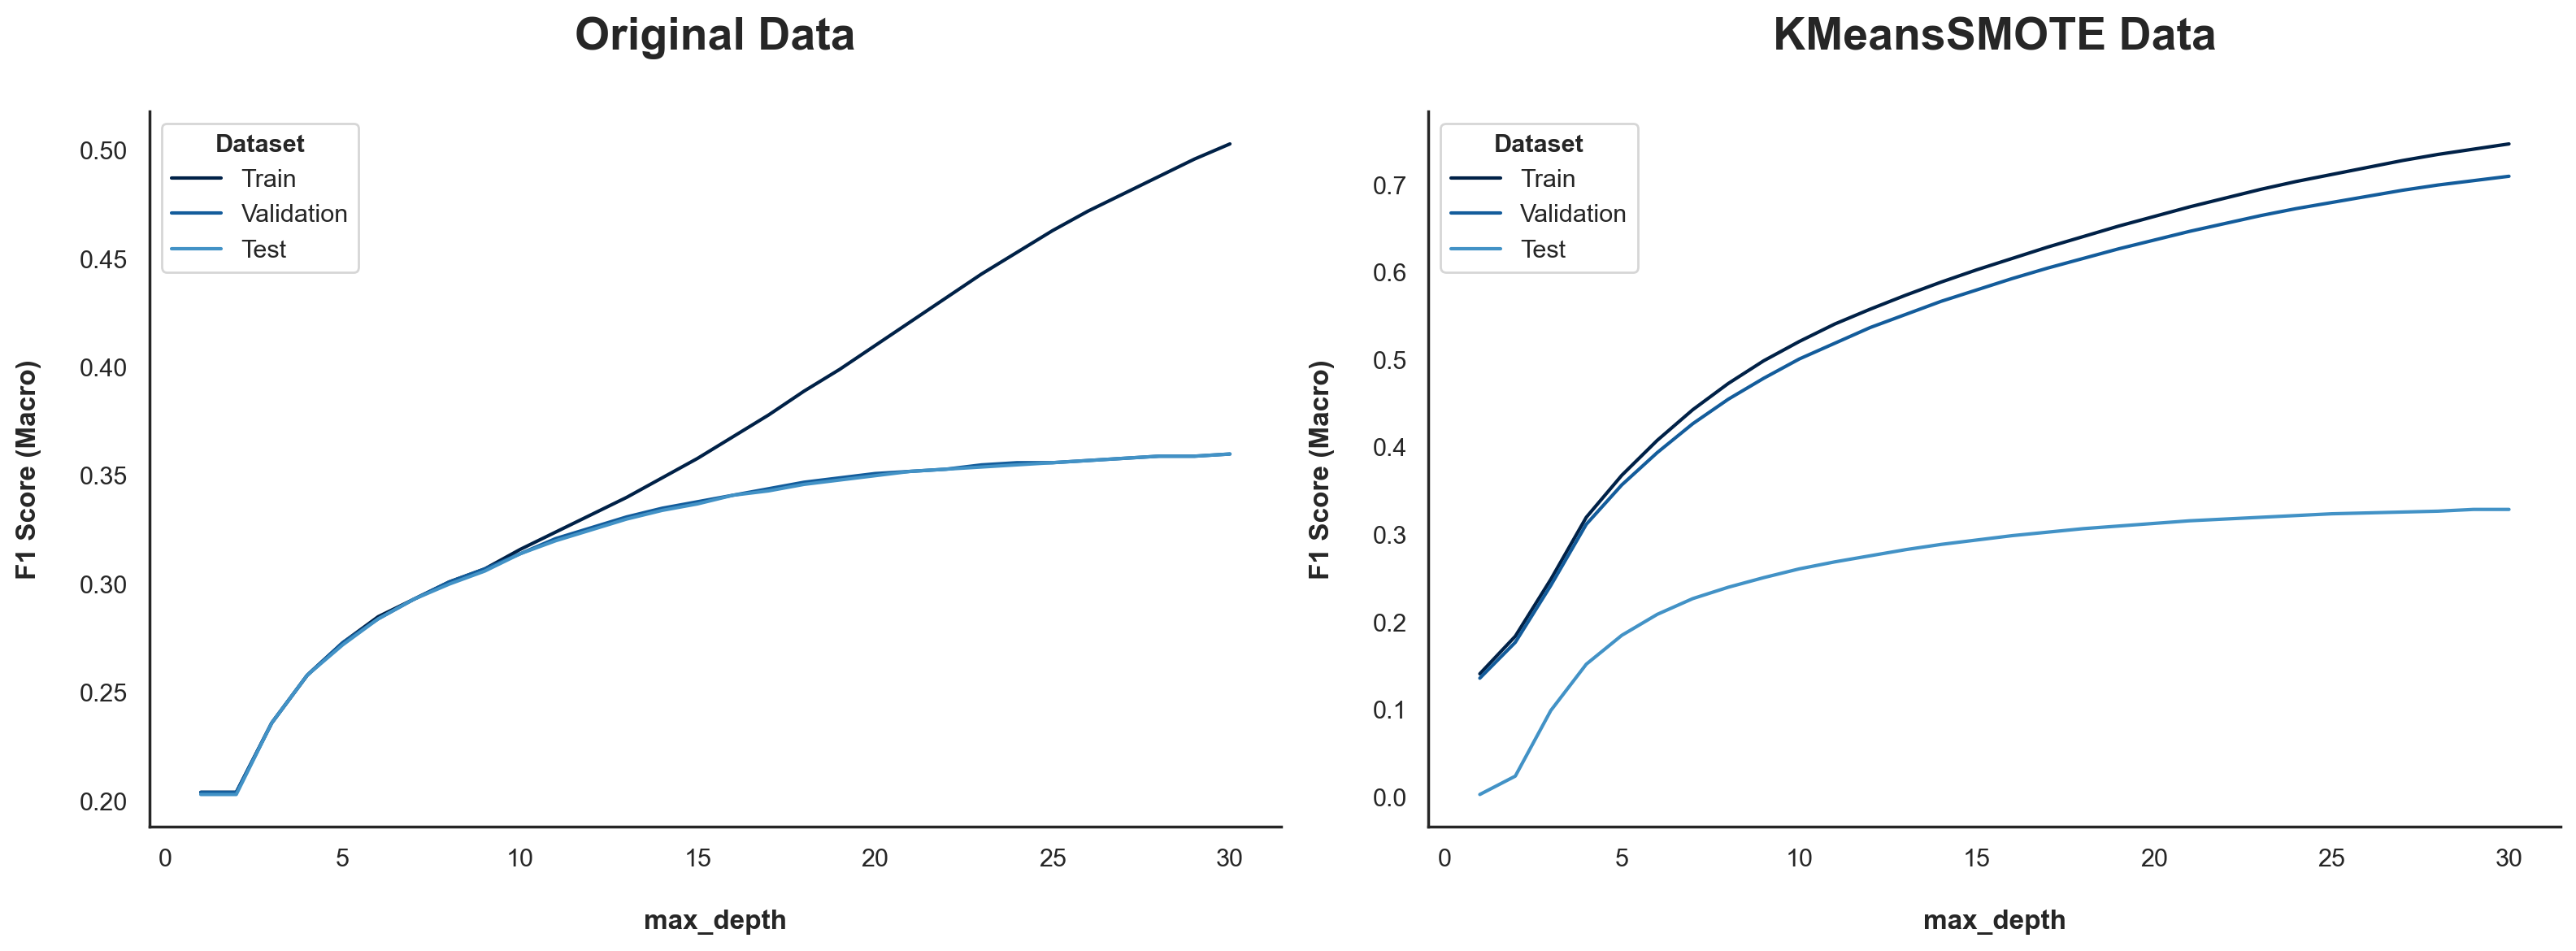

In [26]:
# Function to plot the F1 Score (Macro) for the train and validation datasets with different values of 'max_depth' for Decision Tree
def DT_max_depth(interval, parameter, max_depth = None):
    """
    Evaluates the performance of a Decision Tree Classifier with varying maximum depths using Stratified K-Fold cross-validation.

    Args:
        interval (list): A list of integers representing the range of maximum depths to evaluate.
        parameter (str): The name of the parameter being evaluated (e.g., 'max_depth').
        max_depth (int, optional): The maximum depth of the decision tree. Defaults to None.
    Returns:
        None: This function does not return any value. It prints the best F1 scores for training, validation and testing datasets and plots the F1 scores 
              against the interval of maximum depths.
    """
    
    # Create a Stratified K-Fold object
    skf = StratifiedKFold(n_splits=10)
    
    # Lists to store the results
    train_results, val_results, test_results = [], [], []
    avg_train_results, avg_val_results, avg_test_results = [], [], []
    
    # Loop through the interval of maximum depths
    for value in tqdm(interval):
        # for train_index, test_index in skf.split(X_train,y_train):
        for train_index, test_index in skf.split(X_train_smote, y_train_smote):
            
            # Split the data
            # X_train_DT, X_test_DT = X_train.iloc[train_index], X_train.iloc[test_index]
            # y_train_DT, y_test_DT = y_train.iloc[train_index], y_train.iloc[test_index]
            
            X_train_DT, X_test_DT = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
            y_train_DT, y_test_DT = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]
            
            # Create the Decision Tree Classifier and fit the model
            dt = DecisionTreeClassifier(max_depth = value)
            dt.fit(X_train_DT, y_train_DT)
            
            # Predict the target variable
            train_pred_DT = dt.predict(X_train_DT)
            f1_train = metrics.f1_score(y_train_DT, train_pred_DT, average='macro')
            train_results.append(f1_train)
            
            val_pred_DT = dt.predict(X_test_DT)
            f1_val = metrics.f1_score(y_test_DT, val_pred_DT, average='macro')
            val_results.append(f1_val)
            
            test_pred_DT = dt.predict(X_val)
            f1_test = metrics.f1_score(y_val, test_pred_DT, average='macro')
            test_results.append(f1_test)
            
        # Append the average F1 scores to the lists
        avg_train_results.append(round(np.mean(train_results),3))
        avg_val_results.append(round(np.mean(val_results),3))
        avg_test_results.append(round(np.mean(test_results),3))
    
    # Print the best F1 scores for training, validation and testing datasets
    print('The best f1 score for train is ' + str(max(avg_train_results)) + ' for the depth of ' + str(avg_train_results.index(max(avg_train_results))+1))
    print('The best f1 score for validation is ' + str(max(avg_val_results)) + ' for the depth of ' + str(avg_val_results.index(max(avg_val_results))+1))
    print('The best f1 score for test is ' + str(max(avg_test_results)) + ' for the depth of ' + str(avg_test_results.index(max(avg_test_results))+1) + '\n')
    
    # Dataframe to save the results of the models
    DT_max_depth_results = pd.DataFrame({
        'Train': avg_train_results, 
        'Validation': avg_val_results,
        'Test': avg_test_results
    }, index = range(1, len(interval)+1))
    DT_max_depth_results.index.name = parameter
    
    # Save the results in a csv file
    # DT_max_depth_results.to_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.csv')
    DT_max_depth_results.to_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.csv')
    
    # Plot the F1 scores against the interval of maximum depths   
    plt.plot(interval, avg_train_results, label = "Train F1", color = palette[0])
    plt.plot(interval, avg_val_results, label = "Validation F1", color = palette[2])
    plt.plot(interval, avg_test_results, label = "Test F1", color = palette[4])
    plt.xticks(interval, rotation=0, fontsize=7)
    plt.legend(title='Dataset', fontsize=11,  title_fontproperties={'weight':'bold', 'size':'11'}) 
    plt.ylabel("F1 Score (Macro) \n", fontsize=12, fontweight='bold')
    plt.xlabel("\n" + str(parameter), fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    sns.despine(right=True, top=True)
    # plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.png', dpi=300, bbox_inches='tight') 
    plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.png', dpi=300, bbox_inches='tight')
    plt.show()

# Apply the function with range of maximum depths from 1 to 30 if the results are not already saved
if not os.path.isfile('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.csv') or not os.path.isfile('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.csv'):
    # Raise a error to inform that some of the results are not saved
    raise ValueError("Some of the results are not saved. Please uncomment the code u need to run, apply the function again and save the results.")

# Otherwise, load the results of the Decision Tree Classifier with varying maximum depths
else:
    # Load the results of the Decision Tree Classifier with varying maximum depths
    DT_max_depth_results_OriginalData = pd.read_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.csv', index_col=0)
    DT_max_depth_results_OriginalData.index.name = 'max_depth'

    DT_max_depth_results_KMeansSMOTE = pd.read_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.csv', index_col=0)
    DT_max_depth_results_KMeansSMOTE.index.name = 'max_depth'
    
    # Plot the F1 scores against the interval of maximum depths [Original Data & KMeansSMOTE Data]
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Original Data
    DT_max_depth_results_OriginalData.plot(ax=ax[0], color=[palette[0], palette[2], palette[4]])
    ax[0].set_title('Original Data\n', fontsize=20, fontweight='bold')  
    ax[0].set_ylabel('F1 Score (Macro)\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nmax_depth', fontsize=12, fontweight='bold')
    ax[0].legend(title='Dataset', fontsize=11,  title_fontproperties={'weight':'bold', 'size':'11'})
    ax[0].tick_params(axis='x', rotation=0)
    
    # KMeansSMOTE Data
    DT_max_depth_results_KMeansSMOTE.plot(ax=ax[1], color=[palette[0], palette[2], palette[4]])
    ax[1].set_title('KMeansSMOTE Data\n', fontsize=20, fontweight='bold')
    ax[1].set_ylabel('F1 Score (Macro)\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nmax_depth', fontsize=12, fontweight='bold')
    ax[1].legend(title='Dataset', fontsize=11,  title_fontproperties={'weight':'bold', 'size':'11'})
    ax[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    sns.despine(right=True, top=True)
    # plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/DT_max_depth.png', dpi=300, bbox_inches='tight')
    plt.show() 
    
## Time of Execution [DT_max_depth] = 34min 43s

> **DT | Maximum Depth**: After analyzing the plot above, we can see that the best value for the maximum depth of the Decision Tree model is **`10`**.

In [27]:
# Function that will run a model and return the model
def run_classification_model(model_name, X, y, verbose=True):
    """Run a classification model and return the trained model.

    Args:
        model_name (str): The name of the model to run.
        X (pd.DataFrame or np.ndarray): The feature matrix.
        y (pd.Series or np.ndarray): The target vector.
        verbose (bool, optional): Whether to display the progress. Defaults to True.

    Returns:
        model: The trained classification model.
    """
    ## -------------- Classification Models --------------
    
    # Set the verbose level
    if verbose:
        verbose_bool = True
        verbose_int = 1
    
    if model_name == 'LR':
        # ------------------------------------ [Logistic Regression] ------------------------------------
        # solver='lbfgs'                 -> Optimization algorithm
        # max_iter=1000                  -> Maximum number of iterations
        # random_state=2024              -> Random seed
        # n_jobs=-1                      -> Use all processors
        model = LogisticRegression(C=1,                               # Regularization strength
                                   penalty="l1",                      # Lasso
                                   solver='saga',                     # Algorithm to use in the optimization problem
                                                                      # Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
                                   max_iter = 1000,                   # Maximum number of iterations
                                   n_jobs=-1,                         # Use all processors
                                   random_state=2024).fit(X, y)       # Random seed
        
    if model_name == 'NB_G': 
        # ------------------------------------ [Gaussian Naive Bayes] ------------------------------------
        # var_smoothing=0.0001 to avoid errors when the variance is zero
        model = GaussianNB(var_smoothing=0.0001).fit(X, y)
    if model_name == 'NB_C':
        # ----------------------------------- [Categorical Naive Bayes] ----------------------------------
        # (default parameters)
        model = CategoricalNB().fit(X, y)
    if model_name == 'KNN':
        # ------------------------------------ [K-Nearest Neighbors] ------------------------------------
        # Based on previous analysis, we will use algorithm='auto' to let the model decide the best algorithm
        #                                         n_neighbors = 12, p = 2 (Euclidean Distance), weights = 'uniform' (Avoids overfitting)        
        model = KNeighborsClassifier(algorithm='auto', n_neighbors=12, p=2, weights='uniform').fit(X, y)
    if model_name == 'NN':
        # --------------------------- [Neural Network | Multi-Layer Perceptron] -------------------------
        # hidden_layer_sizes = (10,10) -> 2 hidden layers with 10 neurons each
        # solver = 'adam'              -> Stochastic Gradient Descent
        # activation = 'relu'          -> Rectified Linear Unit 
        # learning_rate_init = 0.001   -> Initial learning rate
        # max_iter = 1000              -> Maximum number of iterations
        model = MLPClassifier(hidden_layer_sizes = (9, 9, 9), max_iter = 1000, alpha=0.0001, solver = 'adam', learning_rate_init = 0.001, 
                              activation = 'relu', learning_rate = 'adaptive', tol = 1e-4, verbose = verbose_bool, random_state=2024).fit(X, y) ########### CHOSE PARAMETERS
    if model_name == 'DT':
        # ------------------------------------ [Decision Tree] ------------------------------------
        # criterion='entropy'        -> Information Gain
        # max_depth = 10             -> Maximum depth of the tree
        model = DecisionTreeClassifier(criterion='gini', max_depth = 15, random_state=2024).fit(X, y)    
    ## -------------- Ensemble Models --------------
    if model_name == 'RF':
        # ------------------------------------ [Random Forest] ------------------------------------
        # max_depth = 20             -> Maximum depth of the tree
        # min_samples_leaf = 10      -> Minimum number of samples required to be at a leaf node
        model = RandomForestClassifier(criterion='gini',max_depth = 20, min_samples_leaf = 2, verbose = verbose_int, n_jobs=-1, random_state=2024).fit(X, y)
    if model_name == 'Bag':
        # ------------------------------------ [Bagging] ------------------------------------
        model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, verbose = verbose_int, random_state=2024).fit(X, y)
    
    # =========================================== [Extra] ===========================================
    if model_name == 'Cat':
        # ------------------------------------ [CatBoost] ------------------------------------
        # Source: https://catboost.ai/docs/en/concepts/python-usages-examples
        # depth= 10                  -> Depth of the trees
        # iterations= 500            -> Number of trees
        # eval_metric = 'F1'         -> Metric to evaluate the model
        # loss_function='MultiClass' -> Loss function for multi-class classification
        # 
        # Pool(X, y)                 -> To avoid overfitting
        X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.1, stratify = y) # Split the data into training and evaluation sets [Just for CatBoost - To avoid overfitting]
        model = CatBoostClassifier(iterations= 100, loss_function='MultiClass', random_state=2024) \
                .fit(X_train, y_train, eval_set=Pool(X_eval, y_eval,cat_features=binary_columns), cat_features=binary_columns) # plot=True
                # .fit(X_train, y_train, eval_set=(X_eval, y_eval), plot=True)
    
    if model_name == 'ExtraTrees':
        # ------------------------------------ [Extra Trees] ------------------------------------
        # n_estimators=100            -> Number of trees
        # max_depth=20                -> Maximum depth of the tree
        # min_samples_leaf=10         -> Minimum number of samples required to be at a leaf node
        model = ExtraTreesClassifier(n_estimators=1000, max_depth=20, verbose=verbose_int, n_jobs=-1, random_state=2024).fit(X, y)
                 
    if model_name == 'Stacking':
        # ------------------------------------ [Stacking] ------------------------------------
        estimators = [
            ('rf', RandomForestClassifier(max_depth = 20, n_estimators=1000, min_samples_leaf = 10, random_state=2024)),       ####### Change after we know the best models
        ]
        model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), verbose = verbose_int).fit(X, y)
    
    return model

In [28]:
# # Cell to run just one model [Exemplification of how to use the functions]
# model_name = 'Cat'

# begin = time.perf_counter()
# # model = run_classification_model(model_name, X_train, y_train)                # Original Data
# model = run_classification_model(model_name, X_train_norm, y_train)           # MinMaxScaler
# # model = run_classification_model(model_name, X_train_stand, y_train)          # StandardScaler
# # model = run_classification_model(model_name, X_train_robust_scaled, y_train)  # RobustScaler

# # model = run_classification_model(model_name, X_train_smote, y_train_smote)                # KMeansSMOTE | (W/o Scaling)
# # model = run_classification_model(model_name, X_train_smote_norm, y_train_smote)           # KMeansSMOTE | Normalized Data
# # model = run_classification_model(model_name, X_train_smote_stand, y_train_smote)          # KMeansSMOTE | Standardized Data
# # model = run_classification_model(model_name, X_train_smote_robust_scaled, y_train_smote)  # KMeansSMOTE | RobustScaler Data
# end = time.perf_counter()

# # Classification Metrics
# models_results_train, models_results_val = classification_metrics(model_name, model, round(end - begin,2),
#                                                                   # X_train, X_val, y_train, y_val,                                     # Original Data
#                                                                   # X_train_norm, X_val_norm, y_train, y_val,                           # MinMaxScaler
#                                                                   # X_train_stand, X_val_stand, y_train, y_val,                         # StandardScaler
#                                                                   X_train_robust_scaled, X_val_robust_scaled, y_train, y_val,           # RobustScaler
#                                                                   # X_train_smote, X_val, y_train_smote, y_val,                              # KMeansSMOTE | (W/o Scaling)
#                                                                   # X_train_smote_norm, X_val_norm, y_train_smote, y_val,                    # KMeansSMOTE | MinMaxScaler
#                                                                   # X_train_smote_stand, X_val_stand, y_train_smote, y_val,                  # KMeansSMOTE | StandardScaler
#                                                                   # X_train_smote_robust_scaled, X_val_robust_scaled, y_train_smote, y_val,  # KMeansSMOTE | RobustScaler
#                                                                   classification_report_show=True)

# # Display the results of the models
# display_side_by_side(pd.DataFrame(models_results_train).T,
#                      pd.DataFrame(models_results_val).T, 
#                      titles=['Training Data', 'Validation Data'],
#                      super_title='Classification Metrics')

In [29]:
# # For loop to run all models | Hold-out Validation
# models_results_train = {}
# models_results_val = {}


# models = ['LR', 'NB_G', 'NB_C', 'KNN', 'NN', 'DT', 'RF', 'Bag', 'Cat', 'ExtraTrees', 'Stacking']  # List with all models to run [Original Data]

# # For loop to run all models | Hold-out Validation [With Scaling]
# # models = ['LR', 'KNN', 'NN', 'Bag', 'Cat', 'Stacking']           # List with the models that need scaling
# # Loop through the models and print progress bar with tqdm
# # Source: https://stackoverflow.com/questions/37506645/can-i-add-message-to-the-tqdm-progressbar
# loop_obj = tqdm(enumerate(models), total=len(models))
# for idx, model_name in loop_obj:
    
#     loop_obj.set_description(f'Running Model: {model_name}')
    
#     # Check if there's a next model
#     next_model = models[idx + 1] if idx + 1 < len(models) else " Done! :)"
#     loop_obj.set_postfix(next_model = f'{next_model}')
    
#     # Run the classification model and calculate 'Time of Execution' for each model [Hold-out Validation]
    
#     # Avoid errors for the models that don't support negative values
#     try:
#         begin = time.perf_counter()
#         # model = run_classification_model(model_name, X_train, y_train)                           # Original Data [André]
#         # model = run_classification_model(model_name, X_train_norm, y_train)                      # MinMaxScaler [Zofia]
#         # model = run_classification_model(model_name, X_train_stand, y_train)                     # StandardScaler [João]
#         # model = run_classification_model(model_name, X_train_robust_scaled, y_train)             # RobustScaler [Simone]
        
#         # model = run_classification_model(model_name, X_train_smote, y_train_smote)               # KMeansSMOTE (W/o Scaling) [André]
#         # model = run_classification_model(model_name, X_train_smote_norm, y_train_smote)          # KMeansSMOTE (MinMaxScaler) [Steven]
#         # model = run_classification_model(model_name, X_train_smote_stand, y_train_smote)         # KMeansSMOTE (StandardScaler) [João]
#         # model = run_classification_model(model_name, X_train_smote_robust_scaled, y_train_smote) # KMeansSMOTE (RobustScaler) [Simone]
#         end = time.perf_counter()
        
#     except ValueError as e:
#         print(f"Error: {e}")
#         continue
    
#     # Calculate the time of execution
#     time_execution = round(end - begin, 2)
    
#     # Calculate the classification metrics    
#     train_metrics, val_metrics = classification_metrics(model_name, model, time_execution,                                               ###################### CHANGE TO THE BEST SCALER
#                                                         # X_train, X_val, y_train, y_val,                                                # Original Data
#                                                         # X_train_norm, X_val_norm, y_train, y_val,                                      # MinMaxScaler
#                                                         # X_train_stand, X_val_stand, y_train, y_val,                                    # StandardScaler
#                                                         # X_train_robust_scaled, X_val_robust_scaled, y_train, y_val,                    # RobustScaler
                                                        
#                                                         # X_train_smote, X_val, y_train_smote, y_val,                                    # KMeansSMOTE (W/o Scaling)
#                                                         # X_train_smote_norm, X_val_smote_norm, y_train_smote, y_val,                    # KMeansSMOTE (MinMaxScaler)
#                                                         # X_train_smote_stand, X_val_smote_stand, y_train_smote, y_val,                  # KMeansSMOTE (StandardScaler)
#                                                         # X_train_smote_robust_scaled, X_val_smote_robust_scaled, y_train_smote, y_val,  # KMeansSMOTE (RobustScaler)
#                                                         classification_report_show=False)
    
#     # Add the metrics to the results dictionary
#     models_results_train.update(train_metrics)
#     models_results_val.update(val_metrics)
    
#     # Calculate average metrics for the model
#     avg_accuracy_train = train_metrics[model_name]['Accuracy']
#     avg_accuracy_val = val_metrics[model_name]['Accuracy']
#     avg_precision_train = train_metrics[model_name]['Precision']
#     avg_precision_val = val_metrics[model_name]['Precision']
#     avg_recall_train = train_metrics[model_name]['Recall']
#     avg_recall_val = val_metrics[model_name]['Recall']
#     avg_f1_train = train_metrics[model_name]['F1 Score']
#     avg_f1_val = val_metrics[model_name]['F1 Score']
#     avg_auc_train = train_metrics[model_name]['AUROC']
#     avg_auc_val = val_metrics[model_name]['AUROC']
    
#     # Print the results of the model
#     print(f"Model: {model_name:<10} | Time: {time_execution}s -- "
#           f"Accuracy (Train/Val): {avg_accuracy_train} | {avg_accuracy_val} -- "
#           f"Precision (Train/Val): {avg_precision_train} | {avg_precision_val} -- "
#           f"Recall (Train/Val): {avg_recall_train} | {avg_recall_val} -- "
#           f"F1 (Train/Val): {avg_f1_train} | {avg_f1_val} -- "
#           f"AUROC (Train/Val): {avg_auc_train} | {avg_auc_val}")

# # Display the results of the models
# display_side_by_side(pd.DataFrame(models_results_train).T, 
#                      pd.DataFrame(models_results_val).T, 
#                      titles=['Training Data', 'Validation Data'],
#                      super_title='Classification Metrics')

# ## Time of Execution [Original Data] = 3h 12min 3s
# Running Model: Stacking: 100%|██████████| 11/11 [3:12:03<00:00, 1047.59s/it, next_model=Done! :)]

# ## Time of Execution [KMeansSMOTE Data w/Scaling] = 5h 40min 16s
# Running Model: KNN:  27%|██▋       | 3/11 [1:15:04<2:14:57, 1012.20s/it + ~KNN + Running Model: Stacking: 100%|██████████| 7/7 [4:25:12<00:00, 2273.29s/it, next_model=Done! :)]


In [30]:
# # Save the results in a Excel file
# df_results_train = pd.DataFrame(models_results_train).T
# df_results_val = pd.DataFrame(models_results_val).T

# df_results_train.index.name = 'Model'
# df_results_val.index.name = 'Model'

# # Save the results in a Excel file using ExcelWriter pandas function
# # with pd.ExcelWriter('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_OriginalData_05.12.2024.xlsx') as writer:                   ####### CHANGE FILE NAME #######
# with pd.ExcelWriter('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_KMeansSMOTEDataWithoutScaler_05.12.2024.xlsx') as writer:
#     df_results_train.to_excel(writer, sheet_name='Train')
#     df_results_val.to_excel(writer, sheet_name='Validation')

> All results can be found in the sheet ***Models_Final*** of the **[Excel Report](./ML_Excel_ReportResults_Group33.xlsx)**.

---

### <a class='anchor' id='3_1'></a> <a class='anchor' id='3_2'></a>  **🧪 Model Selection & 📏 Model Evaluation**

> Given the fact that **`Random Forest`** and **`CatBoost`** are the models with the best performance (trade-off between **F1-Score (Macro)** and *overfitting*), we will use them to optimize the hyperparameters.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0

RF

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.82      0.54      0.65      9358
           2       0.86      0.99      0.92    218308
           3       0.81      0.12      0.20     51679
           4       0.74      0.91      0.82    111380
           5       0.77      0.60      0.67     36210
           6       0.93      0.01      0.02      3158
           7       1.00      0.00      0.00        73
           8       0.91      0.27      0.42       353

    accuracy                           0.81    430519
   macro avg       0.85      0.43      0.46    430519
weighted avg       0.81      0.81      0.77    430519


AUROC: 0.96
____________

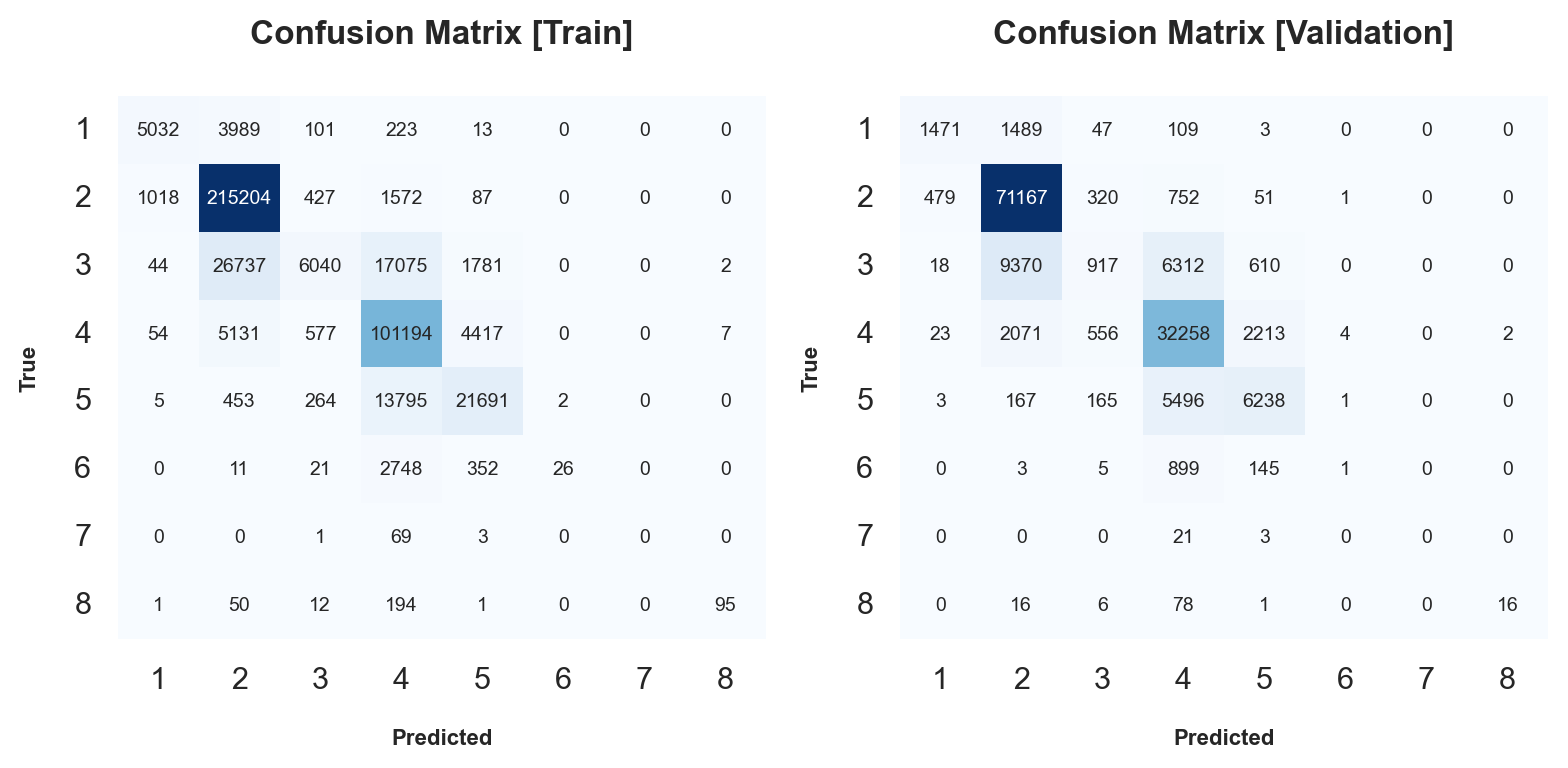

Classification Metrics | Random Forest Training Data 
 
 
 
 Time of Execution 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 RF 
 8.62 
 0.81 
 0.83 
 0.43 
 0.46 
 0.96 
 
 
 Validation Data 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 RF 
 0.78 
 0.63 
 0.38 
 0.4 
 0.92

In [31]:
# ----------------------------------- [Random Forest] -----------------------------------
# Run the Random Forest model with the original data
begin = time.perf_counter()
rf_model = run_classification_model('RF', X_train, y_train)  # Random Forest | Original Data 
end = time.perf_counter()

# Classification Metrics
models_results_train, models_results_val = classification_metrics('RF', rf_model, round(end - begin,2),
                                                                  X_train, X_val, y_train, y_val, classification_report_show=True)

# Display the results of the models
display_side_by_side(pd.DataFrame(models_results_train).T,
                     pd.DataFrame(models_results_val).T, 
                     titles=['Training Data', 'Validation Data'],
                     super_title='Classification Metrics | Random Forest')

Learning rate set to 0.293152
0:	learn: 1.1289580	test: 1.1309899	best: 1.1309899 (0)	total: 199ms	remaining: 19.7s
1:	learn: 0.9623422	test: 0.9650704	best: 0.9650704 (1)	total: 301ms	remaining: 14.7s
2:	learn: 0.8614647	test: 0.8645194	best: 0.8645194 (2)	total: 404ms	remaining: 13.1s
3:	learn: 0.7973425	test: 0.8005217	best: 0.8005217 (3)	total: 503ms	remaining: 12.1s
4:	learn: 0.7544735	test: 0.7581308	best: 0.7581308 (4)	total: 605ms	remaining: 11.5s
5:	learn: 0.7221776	test: 0.7261858	best: 0.7261858 (5)	total: 706ms	remaining: 11.1s
6:	learn: 0.6991786	test: 0.7032965	best: 0.7032965 (6)	total: 805ms	remaining: 10.7s
7:	learn: 0.6828596	test: 0.6871396	best: 0.6871396 (7)	total: 893ms	remaining: 10.3s
8:	learn: 0.6702852	test: 0.6745873	best: 0.6745873 (8)	total: 982ms	remaining: 9.93s
9:	learn: 0.6605677	test: 0.6649756	best: 0.6649756 (9)	total: 1.08s	remaining: 9.71s
10:	learn: 0.6543220	test: 0.6590423	best: 0.6590423 (10)	total: 1.17s	remaining: 9.44s
11:	learn: 0.6497148	t

Cat

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.74      0.48      0.59      9358
           2       0.85      0.98      0.91    218308
           3       0.53      0.06      0.10     51679
           4       0.71      0.87      0.78    111380
           5       0.67      0.53      0.59     36210
           6       0.25      0.00      0.00      3158
           7       1.00      0.00      0.00        73
           8       0.65      0.34      0.45       353

    accuracy                           0.78    430519
   macro avg       0.67      0.41      0.43    430519
weighted avg       0.75      0.78      0.74    430519


AUROC: 0.93
____________

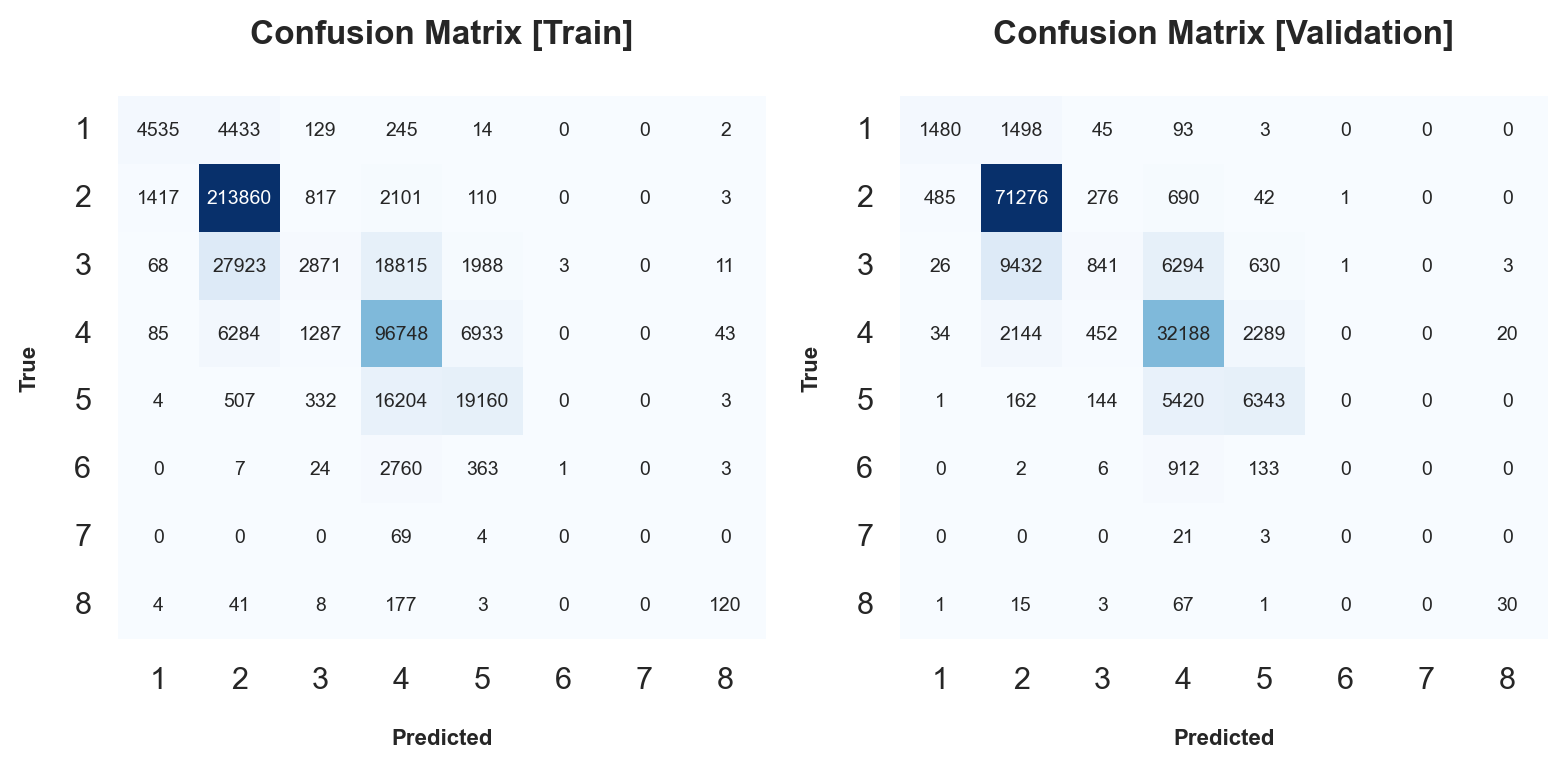

Classification Metrics | CatBoost Training Data 
 
 
 
 Time of Execution 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Cat 
 12.67 
 0.78 
 0.63 
 0.41 
 0.43 
 0.93 
 
 
 Validation Data 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 Cat 
 0.78 
 0.57 
 0.39 
 0.41 
 0.92

In [32]:
# ----------------------------------- [CatBoost] -----------------------------------
# Run the CatBoost model with the original data
begin = time.perf_counter()
cat_model = run_classification_model('Cat', X_train, y_train)  # CatBoost | Original Data
end = time.perf_counter()

# Classification Metrics
models_results_train, models_results_val = classification_metrics('Cat', cat_model, round(end - begin,2),
                                                                  X_train, X_val, y_train, y_val, classification_report_show=True)

# Display the results of the models
display_side_by_side(pd.DataFrame(models_results_train).T,
                     pd.DataFrame(models_results_val).T, 
                     titles=['Training Data', 'Validation Data'],
                     super_title='Classification Metrics | CatBoost')

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

##### **K-Nearest Neighbors [KNN] (11/11/2024)**

In [ ]:
# Optimizing the hyperparameters of the best model
# ------------------------------------------- [Grid Search Cross Validation] -------------------------------------------
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Hyperparameters to be optimized [K-Nearest Neighbors (KNN)]
# k_range = list(range(2, 21))              # Number of neighbors to use by default for kneighbors queries. [2, 20]
# param_grid = {
#     'n_neighbors': k_range,               # Default: 5 -> Number of neighbors to use by default for kneighbors queries.
#     'p': [1, 2]                           # Default: 2 -> Power parameter for the Minkowski metric. 
#                                           #               When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.

#     # [Optional Parameters] -> Since the running time of the algorithm is still considerable, for a first hypermetrization we will only consider the number of neighbors and the distance metric.
#     # 'weights': ['uniform', 'distance'],   # Default: 'uniform' -> weight function used in prediction. 
#     #                                       #          'distance' -> closer neighbors of a query point will have a greater influence than neighbors which are further away.
# }

# # Grid Search w/ Cross Validation
# grid_search = GridSearchCV(KNeighborsClassifier(),  # Model
#                            param_grid,              # Hyperparameters
#                            cv=3,                    # Cross-Validation with 3 folds                         
#                            scoring='f1_macro',      # Metric to optimize
#                            # n_jobs=-1,               # Use all processors (parallelize the execution -> possible to be faster)
#                            #                          For some reason, the parallelization is not working properly for Windows PC
#                            return_train_score=True, # Return the training score
#                            verbose=10)              # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
#                                                     #                 - > 2 : the score is also displayed; > 3 : the fold and candidate parameter indexes are also displayed)

# # Train the GridSearchCV
# grid_search.fit(X_train_ohe_norm, y_train)

# # Best hyperparameters
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# best_estimator = grid_search.best_estimator_

# print('Best Hyperparameters:\n', best_params)
# print('Best Score:\n', best_score)
# print('Best Estimator:\n', best_estimator)

# ## Time of Execution Grid Search Cross Validation = 342m 56s ~5h 43m

```console
Fitting 3 folds for each of 38 candidates, totalling 114 fits

Best Hyperparameters:
 {'n_neighbors': 12, 'p': 2}
Best Score:
 0.369028253496106
Best Estimator:
 KNeighborsClassifier(n_neighbors=12)
```

In [ ]:
# # Save the optimization results in a Excel file
# df_results = pd.DataFrame(grid_search.cv_results_)
# df_results.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_Results_11.11.2024.xlsx')                ################# Change the day

In [ ]:
# # Plot the results of the Grid Search
# # Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearchcv

# # All results of the Grid Search
# grid_mean_scores_means = grid_search.cv_results_['mean_test_score']
# grid_mean_scores_stds = grid_search.cv_results_['std_test_score']
# for mean, std, params in zip(grid_mean_scores_means, grid_mean_scores_stds, grid_search.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

In [ ]:
# # Preparing data for plotting
# p_values = [1, 2]
# accuracy_means_p1 = grid_mean_scores_means[::2]
# accuracy_means_p2 = grid_mean_scores_means[1::2]

# # Plot the results of the Grid Search - Best K
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, accuracy_means_p1, label=rf"$\mathbf{{p=1}}$ (Manhattan Distance)", color='#2171B5', marker='o', markersize=5)
# plt.plot(k_range, accuracy_means_p2, label=rf"$\mathbf{{p=2}}$ (Euclidean Distance)", color='#4292C6', marker='s', markersize=5)

# # Adding labels and title
# plt.xlabel('\nValue of K for KNN', fontsize=12, fontweight='bold')
# plt.ylabel('Cross-Validated | F1 Score (Macro)\n', fontsize=12, fontweight='bold')
# plt.title('Grid Search Cross-Validation Results | Best K\n', fontsize=16, fontweight='bold')

# # Customizing the plot
# plt.legend(title="Distance Metric", loc='center right', fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'}, frameon=False)
# plt.xticks(k_range)

# sns.despine(right=True, top=True)
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_K_11.11.2024.png', dpi=200, bbox_inches='tight')
# plt.show()

---

##### **Random Forest [RF]**

In this implementation of the **`GridSearchCV`** method, we used **`PredefinedSplit`** to split the data into training and validation sets. 

- This method is used to avoid data leakage, as the data is already split into training and validation sets.
- The **`PredefinedSplit`** class receives a list of indices that will be used to split the data.

> **1.** Concatenate the training and validation data. <br>
> **2.** Create a **`PredefinedSplit`** object and pass the indices of the training data to it. [**`-1`** for the training data and **`0`** for the validation data]. <br>
> **3.** Pass the **`PredefinedSplit`** object to the **`cv`** parameter of the **`GridSearchCV`** class. <br>
> **4.** Fit the **`GridSearchCV`** object to the concatenated data. <br>
> **5.** Check the best parameters of the model. <br>

In [38]:
# Combine train and validation datasets
X_combined = np.concatenate([X_train, X_val])                                  # Original Data
y_combined = np.concatenate([y_train, y_val])

# Create a test fold index (-1 for train, 0 for validation)
test_fold = [-1] * len(X_train) + [0] * len(X_val)

print('Test fold: ', len(test_fold))
print('X_combined: ', len(X_combined))
print('y_combined: ', len(y_combined))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

Test fold:  574026
X_combined:  574026
y_combined:  574026


In [ ]:
# Hyperparameters to be optimized [Random Forest]
param_grid_rf = {
    'n_estimators': [100, 200, 500, 1000],                   # Number of trees
    'max_depth': [10, 20, 30, 40],                           # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 3, 4, 5],                     # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy', 'log_loss'],            # Split criterion
    'max_features': ['sqrt', 'log2'],                        # Number of features to consider when looking for the best split
    'class_weight': ['balanced', 'balanced_subsample', None] # Weights associated with classes
}

# Grid Search w/ PredefinedSplit
grid_search = GridSearchCV(estimator= RandomForestClassifier(n_jobs=-1, random_state=2024),  # Model
                        param_grid=param_grid_rf,                                # Hyperparameters
                        cv=ps,                                                   # PredefinedSplit                          
                        scoring='f1_macro',                                      # Metric to optimize
                        # n_jobs=-1,                                             # Use all processors (parallelize the execution -> possible to be faster)
                                                                                 # For some reason, the parallelization is not working properly for Windows PC
                        return_train_score=True,                                 # Return the training score
                        verbose=10)                                              # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
                                                                                 #                 - > 2 : the score is also displayed; > 3 : the fold and candidate parameter indexes are also displayed)
                                                    
# Train the GridSearchCV
grid_search.fit(X_combined, y_combined)

# Results of the Grid Search
best_params = grid_search.best_params_           # Best hyperparameters
best_score = grid_search.best_score_             # Best Score
best_estimator = grid_search.best_estimator_     # Best Estimator

print('------------------------------------------------------------------------------------------------------------------------')
print('\033[1mBest Parameters:\033[0m\n', best_params)
print('\033[1mBest Average Score:\033[0m\n', best_score)
print('\033[1mBest Estimator:\033[0m\n', best_estimator)
print('------------------------------------------------------------------------------------------------------------------------')

# Plot the results of the Grid Search
# Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearch

# All results of the Grid Search
grid_mean_scores_means = grid_search.cv_results_['mean_test_score']
grid_mean_scores_stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(grid_mean_scores_means, grid_mean_scores_stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

## Time of Execution Grid Search [Random Forest] = Xh Xmin Xs

In [ ]:
# Save the optimization results in a Excel file
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_RandomForest_Results_08.12.2024.xlsx')                ################# Change the day

In [ ]:
# Preparing data for plotting
gridsearch_results_rf = pd.read_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_RandomForest_Results_08.12.2024.xlsx') # Load the Excel file

# Plot the results of the Grid Search - Best Hyperparameters
plt.figure(figsize=(12, 6))
sns.lineplot(data=gridsearch_results_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o', palette='Blues', ci=None)

# Adding labels and title
plt.xlabel('\nNumber of Trees (n_estimators)', fontsize=12, fontweight='bold')
plt.ylabel('F1 Score (Macro)\n', fontsize=12, fontweight='bold')
plt.title('Grid Search [RF] Results | Best Hyperparameters', fontsize=16, fontweight='bold')
plt.suptitle('Number of Trees & Maximum Depth\n', fontsize=12, fontweight='normal', y=0.88)

# Customizing the plot
plt.legend(title="Max Depth", loc='best', fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'}, frameon=False)

sns.despine(right=True, top=True)
plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_Hyperparameters_RandomForest_08.12.2024.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# Load the Grid Search results
gridsearch_results_rf = pd.read_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_RandomForest_Results_08.12.2024.xlsx')

# Create a figure with subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

# Define the parameters and titles for each subplot
params = [
    ('param_n_estimators', 'Number of Trees (n_estimators)'),
    ('param_max_depth', 'Max Depth'),
    ('param_min_samples_leaf', 'Min Samples Leaf'),
    ('param_criterion', 'Criterion'),
    ('param_max_features', 'Max Features'),
    ('param_class_weight', 'Class Weight')
]

# Loop through the parameters and create subplots
for i, (param, xlabel) in enumerate(params):
    row, col = divmod(i, 3)
    sns.lineplot(data=gridsearch_results_rf, x=param, y='mean_test_score', hue='param_max_depth', marker='o', 
                 palette=[palette[0], palette[2], palette[4], palette[6]][::-1], ci=None, ax=ax[row, col])
    ax[row, col].set_xlabel(xlabel, fontsize=12, fontweight='bold')
    ax[row, col].set_ylabel('F1 Score (Macro)\n', fontsize=12, fontweight='bold')
    ax[row, col].set_title(f'\n{xlabel} vs. F1 Score', fontsize=14, fontweight='bold')
    ax[row, col].legend([], frameon=False)
    
    # Only show y-axis label in the first column
    if col != 0:
        ax[row, col].set_ylabel('')

# Add a legend outside the subplots
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Max Depth", ncol=4, fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'},
           frameon=False, bbox_to_anchor=(.9, 1.04))
    
# Adjust layout
plt.tight_layout()
plt.suptitle('Grid Search [Random Forest] Results | Best Hyperparameters\n', fontsize=16, fontweight='bold', y=1.02)

# Save the plot
sns.despine(right=True, top=True)
plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_Hyperparameters_RandomForest_08.12.2024.png', dpi=200, bbox_inches='tight')
plt.show()


In [ ]:
# Best model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params, n_jobs=-1, random_state=2024).fit(X_train, y_train)

# Classification Metrics & Confusion Matrix for 'distance' model
classification_metrics(
    'RandomForest', best_rf, None,
    X_train, X_val, y_train, y_val,
    classification_report_show=True,
    confusion_matrix_show=True
)
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val,
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Best Model with Grid Search Cross-Validation (Random Forest)')

----

##### **CatBoost [Cat]**

In [28]:
# Combine train and validation datasets
X_combined = np.concatenate([X_train, X_val])                                  # Original Data
y_combined = np.concatenate([y_train, y_val])

# Create a test fold index (-1 for train, 0 for validation)
test_fold = [-1] * len(X_train) + [0] * len(X_val)

print('Test fold: ', len(test_fold))
print('X_combined: ', len(X_combined))
print('y_combined: ', len(y_combined))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

Test fold:  574026
X_combined:  574026
y_combined:  574026


In [ ]:
# Hyperparameters to be optimized
# Source: https://catboost.ai/docs/en/references/training-parameters/common
param_grid_catboost = {
    'depth': [10, 15, 20],                         # Depth of the trees
    # Since we are using MultiClass as the loss function, the model will automatically define the learning_rate
    'iterations': [500, 1000, 2000],               # Number of trees
    'l2_leaf_reg': [0, 1, 2],                      # L2 regularization coefficient
    'bagging_temperature': [0, 1, 2],              # Controls the strength of the bagging
}

# Grid Search w/ PredefinedSplit
grid_search = GridSearchCV(estimator= CatBoostClassifier(loss_function='MultiClass', random_state=2024), # Model
                           param_grid=param_grid_catboost,   # Hyperparameters
                           cv=ps,                   # PredefinedSplit                          
                           scoring='f1_macro',      # Metric to optimize
                           # n_jobs=-1,             # Use all processors (parallelize the execution -> possible to be faster)
                                                    # For some reason, the parallelization is not working properly for Windows PC
                           return_train_score=True, # Return the training score
                           verbose=10)              # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
                                                    #                 - > 2 : the score is also displayed; > 3 : the fold and candidate parameter indexes are also displayed)
                                                    
# Train the GridSearchCV
grid_search.fit(X_combined, y_combined)

# Results of the Grid Search
best_params = grid_search.best_params_           # Best hyperparameters
best_score = grid_search.best_score_             # Best Score
best_estimator = grid_search.best_estimator_     # Best Estimator

print('------------------------------------------------------------------------------------------------------------------------')
print('\033[1mBest Parameters:\033[0m\n', best_params)
print('\033[1mBest Average Score:\033[0m\n', best_score)
print('\033[1mBest Estimator:\033[0m\n', best_estimator)
print('------------------------------------------------------------------------------------------------------------------------')

# Plot the results of the Grid Search
# Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearch

# All results of the Grid Search
grid_mean_scores_means = grid_search.cv_results_['mean_test_score']
grid_mean_scores_stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(grid_mean_scores_means, grid_mean_scores_stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

## Time of Execution Grid Search = Xm Xs [Expected to be around 12/14h]

In [ ]:
# Save the optimization results in a Excel file
grid_search_catboost_results = pd.DataFrame(grid_search.cv_results_)
grid_search_catboost_results.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_CatBoost_Results_08.12.2024.xlsx')

In [ ]:
# Preparing data for plotting
gridsearch_results_catboost = pd.read_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_CatBoost_Results_08.12.2024.xlsx') # Load the Excel file

# Plot the results of the Grid Search - Best Hyperparameters
plt.figure(figsize=(6, 6))
sns.lineplot(data=gridsearch_results_catboost, x='param_iterations', y='mean_test_score', hue='param_depth', marker='o', palette='Blues', ci=None)

# Adding labels and title
plt.xlabel('\nNumber of Trees (iterations)', fontsize=12, fontweight='bold')
plt.ylabel('F1 Score (Macro)\n', fontsize=12, fontweight='bold')
plt.title('Grid Search [CatBoost] Results | Best Hyperparameters', fontsize=16, fontweight='bold')
plt.suptitle('Number of Trees & Depth\n', fontsize=12, fontweight='normal', y=0.88)

# Customizing the plot
plt.legend(title="Depth", loc='best', fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'}, frameon=False)
sns.despine(right=True, top=True)
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_Hyperparameters_CatBoost_08.12.2024.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# Create a figure with subplots
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 5))

# Define the parameters and titles for each subplot
params = [
    ('param_iterations', 'Number of Trees (iterations)'),
    ('param_depth', 'Depth'),
    ('param_l2_leaf_reg', 'L2 Regularization'),
    ('param_bagging_temperature', 'Bagging Temperature')
]

# Loop through the parameters and create subplots
for col, (param, xlabel) in enumerate(params):
    sns.lineplot(data=gridsearch_results_catboost, x=param, y='mean_test_score', hue='param_depth', marker='o', 
                 palette=[palette[0], palette[2], palette[4], palette[6]][::-1], ci=None, ax=ax[col])
    ax[col].set_xlabel(xlabel, fontsize=12, fontweight='bold')
    ax[col].set_ylabel('F1 Score (Macro)\n', fontsize=12, fontweight='bold')
    ax[col].set_title(f'\n{xlabel} vs. F1 Score', fontsize=14, fontweight='bold')
    ax[col].legend([], frameon=False)
    
    # Only show y-axis label in the first column
    if col != 0:
        ax[col].set_ylabel('')
        
# Add a legend outside the subplots
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Depth", ncol=4, fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'},
           frameon=False, bbox_to_anchor=(.9, 1.04))

# Adjust layout
plt.tight_layout()
plt.suptitle('Grid Search [CatBoost] Results | Best Hyperparameters\n', fontsize=16, fontweight='bold', y=1.02)

# Save the plot
sns.despine(right=True, top=True)
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_Hyperparameters_CatBoost_08.12.2024.png', dpi=200, bbox_inches='tight')
plt.show()

---

### 📊 **Feature Importance**

In [ ]:
# [To be continued...]

---

## 🔮 **Test Data Prediction**

In [ ]:
# ------------------------------------------- [Best Model with GridSearch] -------------------------------------------
# Best Model
best_model = best_estimator

# # Predictions on the test_data
pred_test = best_model.predict(test_data)

# Predictions on the test_data
pred_test = best_model.predict(test_data)

## Time of Execution (Best Model with GridSearch CS - Fit with Train+Validation & Test Data) = XXm XXs

In [ ]:
# Create a DataFrame with the 'ID' and the 'Predicted' columns
submission_data = pd.DataFrame({'Claim Identifier': test_data.index, 'Claim Injury Type': pred_test.squeeze()})  # If the data is a Series, use the 'squeeze' method to convert it to a DataFrame
submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)
submission_data

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,1. CANCELLED
387971,6553119,1. CANCELLED
387972,6553542,1. CANCELLED
387973,6553455,1. CANCELLED


---

## 📋 **CSV Export - Submission**

In [ ]:
# Each submission in Kaggle should have different names and should have the version name in the following format 
# – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

# submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')    # 11.11.2024
submission_data.to_csv('submissions/Group33_Version02.csv', index=False, header=True, sep=',')     # 30.11.2024

---

# **🏁 Interpretability and Explanability** [Open Ended-Section]

In [36]:
# !pip install lime

In [37]:
from lime import lime_tabular                                                                       ##################### [To be continued...]

# Create the explainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values, 
                                              mode='classification', 
                                              feature_names=X_train.columns.tolist(), 
                                              class_names=list(claim_injury_type_dict_swapped.values()), 
                                              random_state=2024)

# Select a random observation
observation = 100

# Get the observation
observation_data = X_train.iloc[observation]

# Get the prediction
# prediction = best_model.predict(observation_data.values.reshape(1, -1))[0]
prediction = rf_model.predict(observation_data.values.reshape(1, -1))[0]

# Get the prediction probabilities
# prediction_probabilities = best_model.predict_proba(observation_data.values.reshape(1, -1))[0]
prediction_probabilities = rf_model.predict_proba(observation_data.values.reshape(1, -1))[0]

# Get the local explanation
# explanation = explainer.explain_instance(observation_data, best_model.predict_proba)
explanation = explainer.explain_instance(observation_data, rf_model.predict_proba)

# Display the prediction and the probabilities
# print(f'Prediction: {claim_injury_type_dict_swapped[prediction]}')
# print('Probabilities:')
# for idx, (claim_injury_type, probability) in enumerate(zip(claim_injury_type_dict_swapped.values(), prediction_probabilities)):
#     print(f'{claim_injury_type}: {probability:.2f}')
    
# Display the local explanation
explanation.show_in_notebook()

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


### **Interpretability and Explanability**

**There are 3 parts to the explanation:**

1. **Prediction Probability**: The leftmost section displays prediction probabilities.
2. **Top 10 Features**: The middle section returns 10 most important features. For the binary classification task, it would be in 2 colors orange/blue. Attributes in orange support class 1 and those in blue support class 0.
3. **Actual Values**: The rightmost section contains the actual values of the top 10 variables.


---

# **🔵 Save Model (Pickle)** [Open Ended-Section]

In [33]:
# Source: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle
import gzip

# Save the model to disk -> For use in Web Application (Open-Ended Section) [Compression]
with gzip.open('../[ML]_WebApp_Group33/BestModel_Compressed.sav.gz', 'wb') as f:
    pickle.dump(rf_model, f)
    # pickle.dump(best_model, f)

In [55]:
# Load the original data
train_data_original = pd.read_parquet('./data/1stNotebook/train_data_cleaned.parquet')

# List of Industry Code Description + WCIO Cause of Injury + WCIO Part of Body + WCIO Nature of Injury
industry_code_description = train_data_original['Industry Code Description'].unique()
wcio_cause_injury = train_data_original['WCIO Cause of Injury Bucket'].unique()
wcio_part_body = train_data_original['WCIO Part of Body Bucket'].unique()
wcio_nature_injury = train_data_original['WCIO Nature of Injury Bucket'].unique()

# Print the unique values
print('\nIndustry Code Description:')
sorted([x for x in industry_code_description if x is not None])


Industry Code Description:


['ACCOMMODATION AND FOOD SERVICES',
 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
 'AGRICULTURE, FORESTRY, FISHING AND HUNTING',
 'ARTS, ENTERTAINMENT, AND RECREATION',
 'CONSTRUCTION',
 'EDUCATIONAL SERVICES',
 'FINANCE AND INSURANCE',
 'HEALTH CARE AND SOCIAL ASSISTANCE',
 'INFORMATION',
 'MANAGEMENT OF COMPANIES AND ENTERPRISES',
 'MANUFACTURING',
 'MINING',
 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
 'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
 'PUBLIC ADMINISTRATION',
 'REAL ESTATE AND RENTAL AND LEASING',
 'RETAIL TRADE',
 'TRANSPORTATION AND WAREHOUSING',
 'UTILITIES',
 'WHOLESALE TRADE']

In [56]:
print('\nWCIO Cause of Injury:')
sorted([x for x in wcio_cause_injury if x is not None])


WCIO Cause of Injury:


['0 - Unknown',
 '1 - Temp',
 '10 - Miscellaneous',
 '2 - Caught',
 '3 - Cut',
 '4 - Fall',
 '5 - Motor Vehicle',
 '6 - Strain_data',
 '7 - Striking',
 '8 - Struck',
 '9 - Rubbed']

In [57]:
print('\nWCIO Part of Body:')
sorted([x for x in wcio_part_body if x is not None])


WCIO Part of Body:


['0 - Unknown',
 'I - Head',
 'II - Neck',
 'III - Upper Extremities',
 'IV - Trunk',
 'V - Lower Extremities',
 'VI - Multiple Body Parts']

In [58]:
print('\nWCIO Nature of Injury:', )
sorted([x for x in wcio_nature_injury if x is not None])


WCIO Nature of Injury:


['0 - Unknown', '1 - Specific', '2 - Occupational/Cumulative', '3 - Multiple']

In [59]:
# List of Features used in the model
features = X_train.columns.tolist()
features

['Age at Injury Clean',
 'Assembly Date Year',
 'C-2 Date Year',
 'Accident Date Binary',
 'Alternative Dispute Resolution_Y',
 'Attorney/Representative_Y',
 'C-2 Date Binary',
 'C-3 Date Binary',
 'COVID-19 Indicator_Y',
 'Carrier Type Bucket_1A. PRIVATE',
 'Carrier Type Bucket_2A. SIF',
 'Carrier Type Bucket_3A. SELF PUBLIC',
 'Carrier Type Bucket_4A. SELF PRIVATE',
 'Carrier Type Bucket_5A-5C. SPECIAL FUND',
 'District Name_NYC',
 'First Hearing Date Binary',
 'Gender_M',
 'IME-4 Reported',
 'Industry Code Description_CONSTRUCTION',
 'Industry Code Description_PUBLIC ADMINISTRATION',
 'Industry Code Description_Unknown',
 'WCIO Cause of Injury Bucket_3 - Cut',
 'WCIO Cause of Injury Bucket_6 - Strain_data',
 'WCIO Nature of Injury Bucket_1 - Specific',
 'WCIO Nature of Injury Bucket_2 - Occupational/Cumulative',
 'WCIO Nature of Injury Bucket_3 - Multiple',
 'WCIO Part of Body Bucket_III - Upper Extremities',
 'WCIO Part of Body Bucket_IV - Trunk',
 'WCIO Part of Body Bucket_V - Low

---

# **🔗 Bibliography/References**

**[[0]](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)** Kelleher, J. D., Brian Mac Namee, & Aoife D'arcy. (2015). Fundamentals of machine learning for predictive data analytics : algorithms, worked examples, and case studies (pp. 460–480). The Mit Press.

**[[1]](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** Scikit-Learn. (2022), "Logistic Regression." https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

**[[2]](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** Scikit-Learn. (2022), "Naive Bayes." https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html

**[[3]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** Scikit-Learn. (2022), "K-Nearest Neighbors." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**[[3.1]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)** Scikit-Learn. (2022), "KNN - Brute Force." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html

**[[3.2]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)** Scikit-Learn. (2022), "KNN - KD Tree." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html

**[[3.3]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)** Scikit-Learn. (2022), "KNN - Ball Tree." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html

**[[4]](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** Scikit-Learn. (2022), "Neural Network." https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html

**[[5]](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** Scikit-Learn. (2022), "Decision Tree." https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**[[6]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** Scikit-Learn. (2022), "Random Forest." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**[[7]](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** Scikit-Learn. (2022), "Support Vector Machine." https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html

**[[8]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** Scikit-Learn. (2022), "Gradient Boosting." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

**[[9]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html)** Scikit-Learn. (2022), "Bagging." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html

**[[10]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)** Scikit-Learn. (2022), "AdaBoost." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

**[[11]](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)** CatBoost. (2022), "CatBoost." https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html

**[[12]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html)** Scikit-Learn. (2022), "Stacking." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html

<br>

---